In [1]:
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import astropy.units as u
import astropy.constants as c
from astropy.table import Table
import numpy as np
from matplotlib import colors
import glob
import pandas as pd
from astropy.io import ascii
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

# Setting things up

In [2]:
cc = ['#f72585', '#7209b7', '#FFBC42', '#4361ee', '#4cc9f0']
times = ['01:38', '02:35 (eclipse)', '02:58 (eclipse)', '04:34']

In [3]:
files = sorted(glob.glob('./spectra/spec*'))

In [4]:
lines = {'He I 1.083': 1.083,
         'C IV 1.191': 1.191,
         'C III 1.198': 1.198,
         'C III 1.255': 1.255,
         'He I 1.278': 1.278,
         'He I 1.701': 1.701,
         'C II 1.785': 1.785,
         'He I 2.059': 2.059,
         'C IV 2.075': 2.075,
         'C III 2.085': 2.085,
         'He I 2.113': 2.113,
         'C III 2.114': 2.114,
         'He I 2.165': 2.165,
         'C II 2.188': 2.188,
         'He II 2.189': 2.189,
         'C III 2.325': 2.325,
         'CO low J 2.35': 2.35}

In [5]:
obs0 = np.load(files[0])
obs1 = np.load(files[1])
obs2 = np.load(files[2])
obs3 = np.load(files[3])

# limit to between 1-2.4 microns
obs0 = (obs0.T[(obs0[0]>1)*(obs0[0]<2.4)]).T
obs1 = (obs1.T[(obs1[0]>1)*(obs1[0]<2.4)]).T
obs2 = (obs2.T[(obs2[0]>1)*(obs2[0]<2.4)]).T
obs3 = (obs3.T[(obs3[0]>1)*(obs3[0]<2.4)]).T

specs = [obs0, obs1, obs2, obs3]

spec_med = np.median(specs, axis=0)

# Plot lines from list

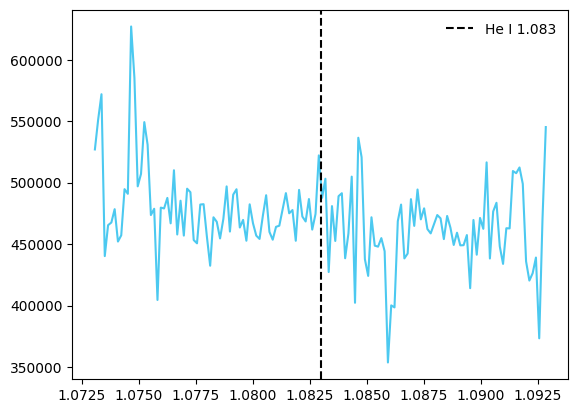

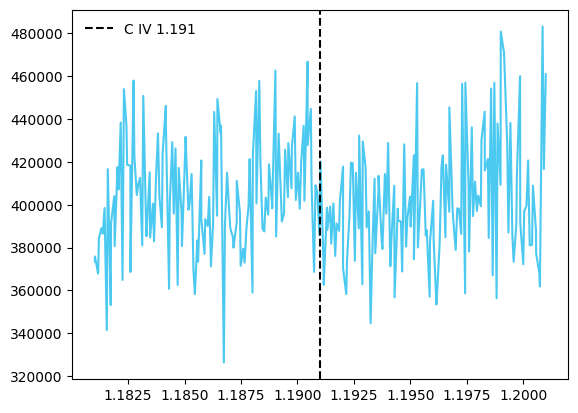

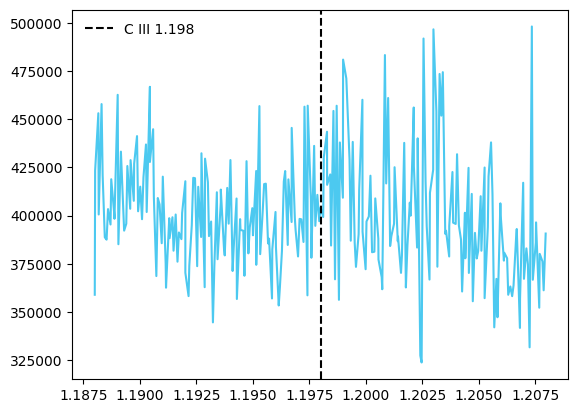

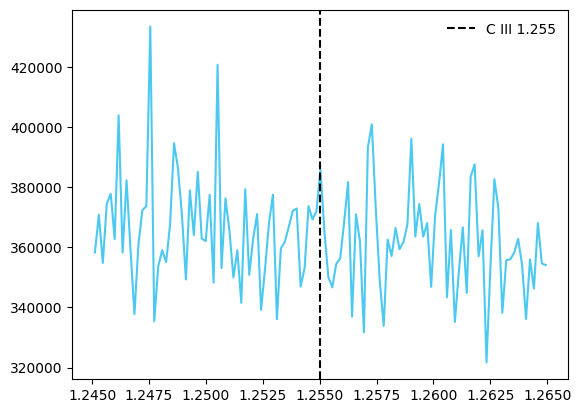

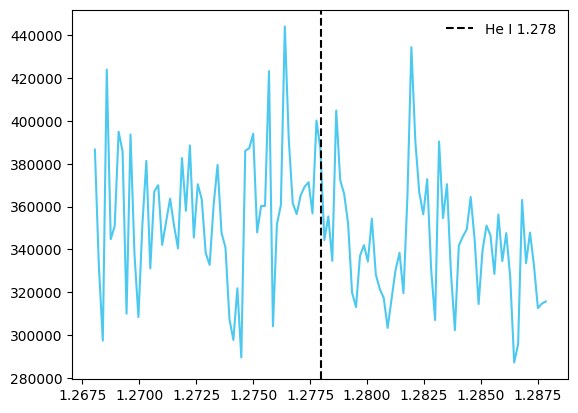

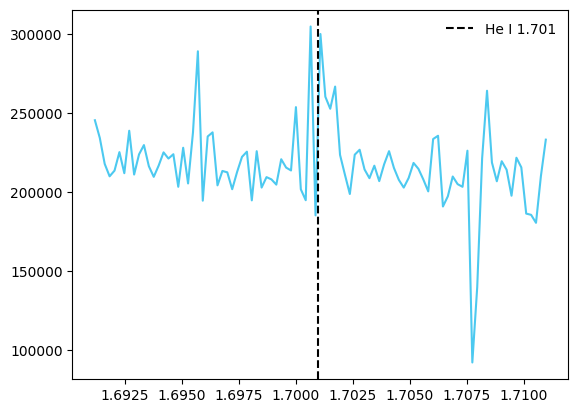

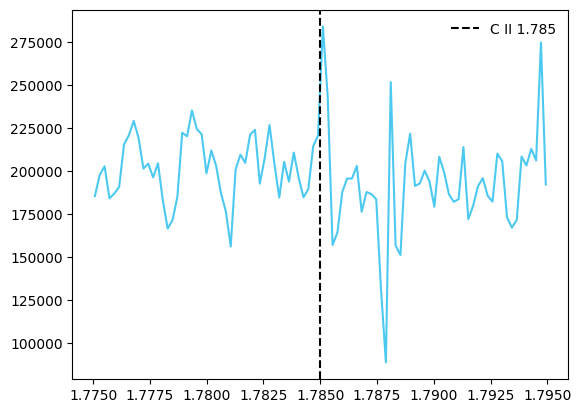

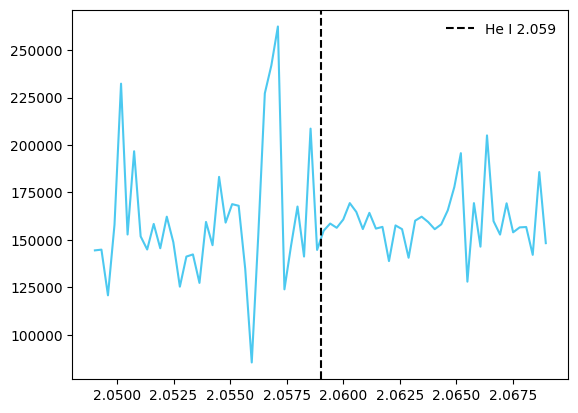

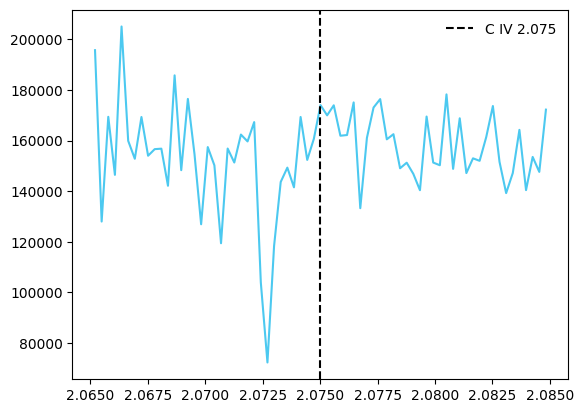

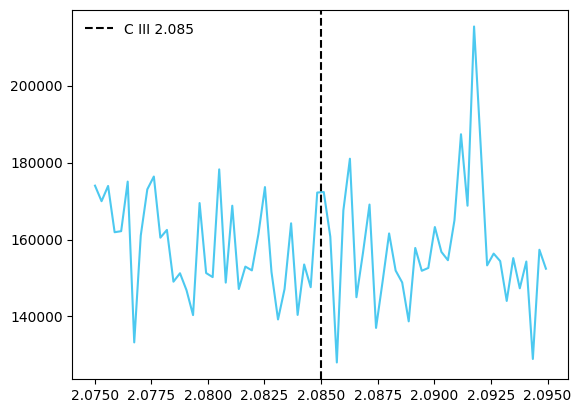

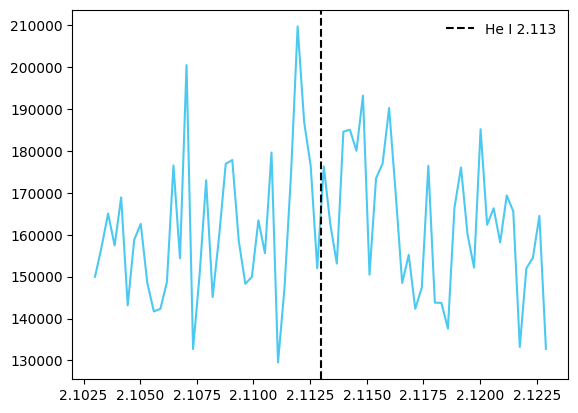

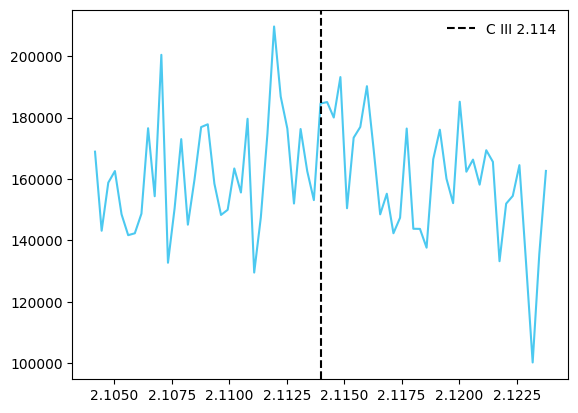

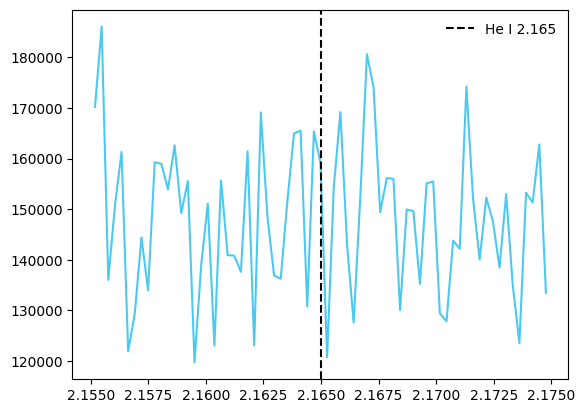

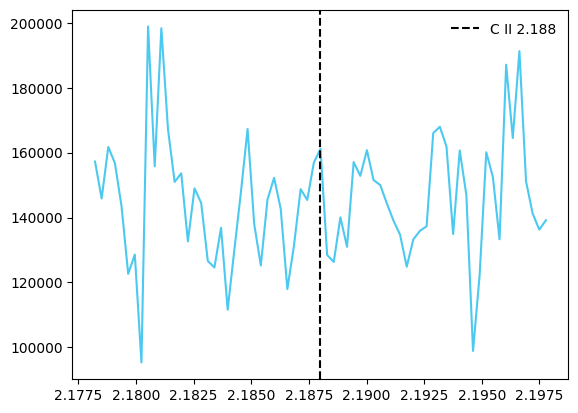

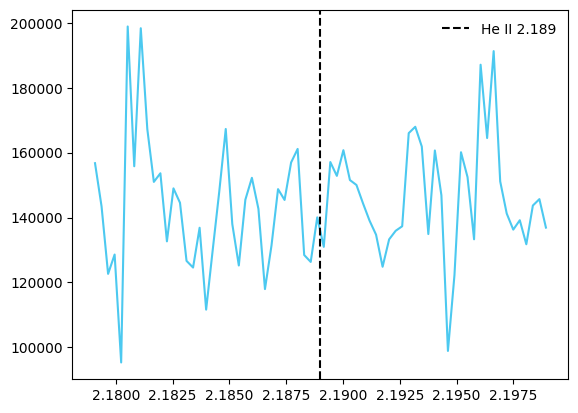

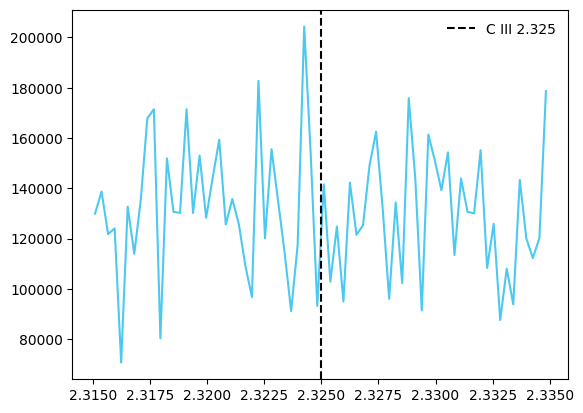

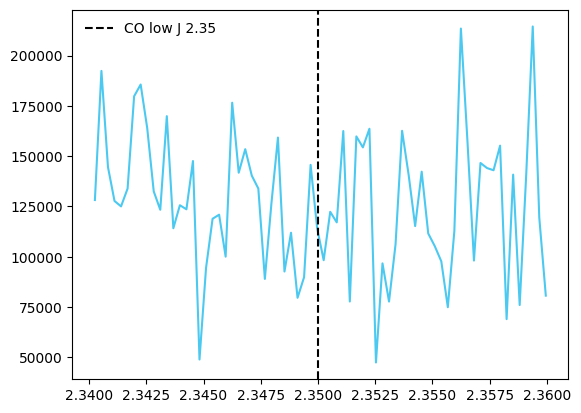

In [6]:
def plot_lines(spec, c):
    for line in lines:
        lim = (spec[0] > lines[line] - 0.01)*(spec[0] < lines[line] + 0.01)
        plt.plot(spec[0][lim], spec[1][lim], c=c)
        plt.axvline(lines[line], c='k', ls='--', label=line)
        plt.legend(frameon=False)
        plt.show()

plot_lines(spec_med, cc[4])

# Plot lines from list, for all 4 spectra

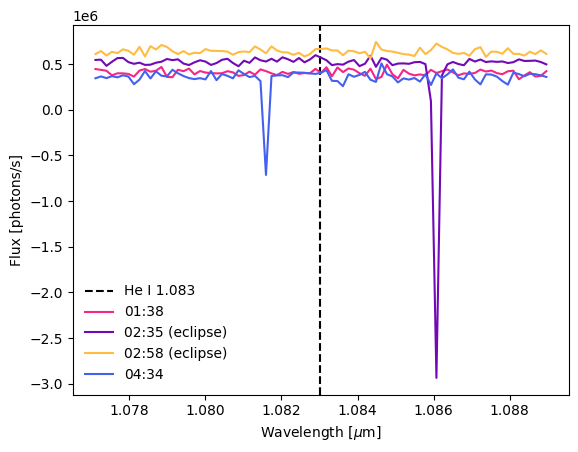

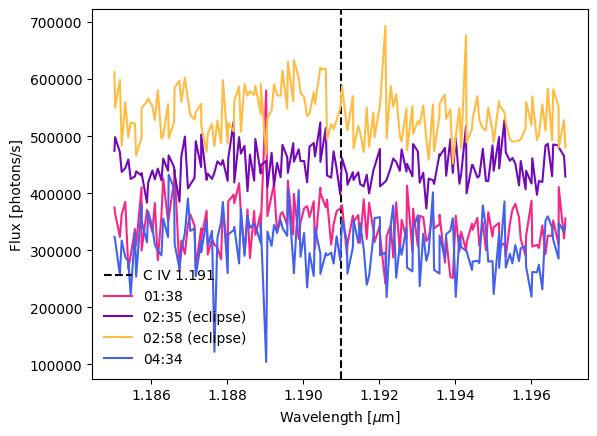

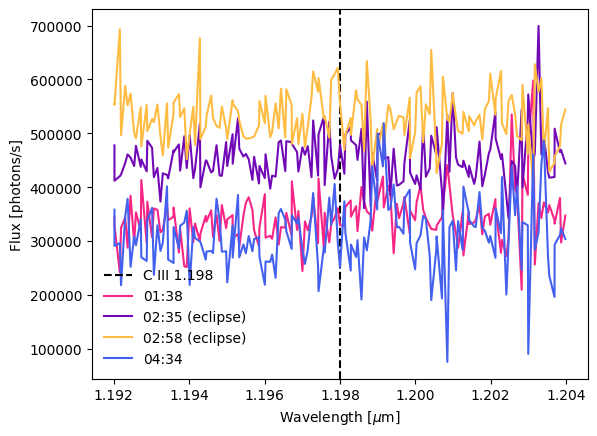

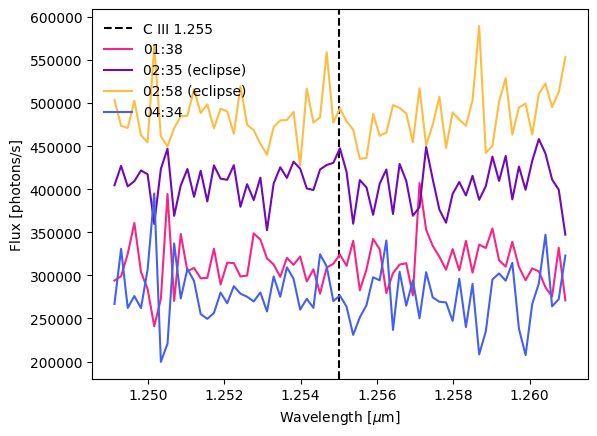

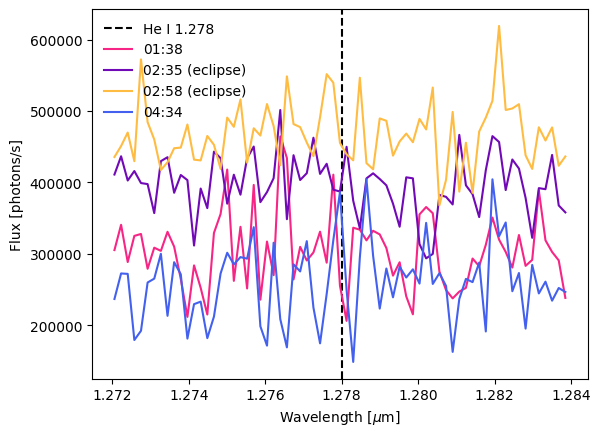

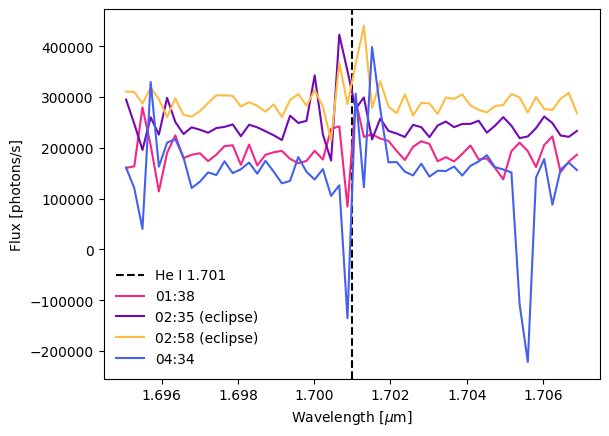

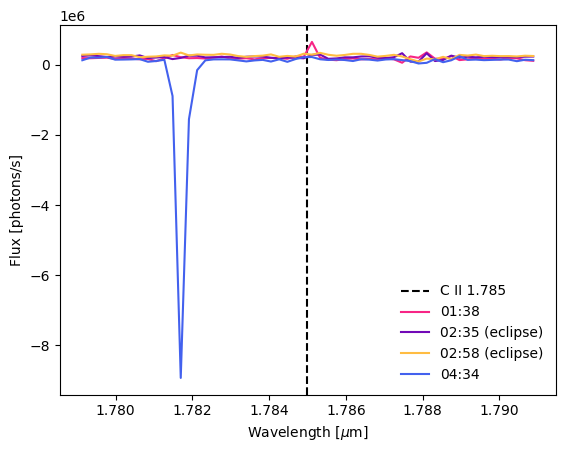

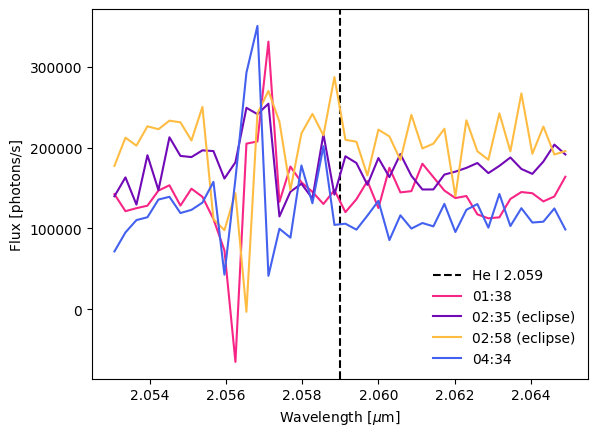

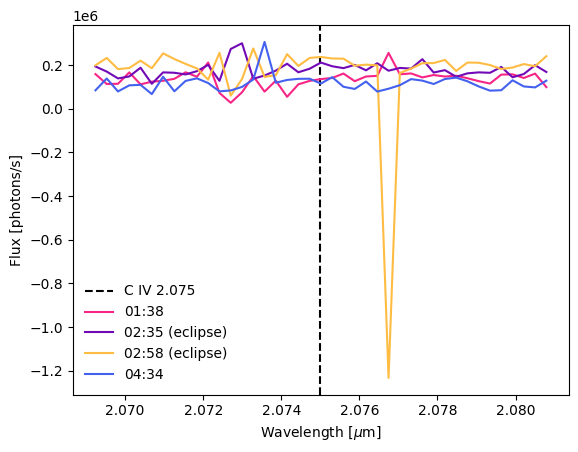

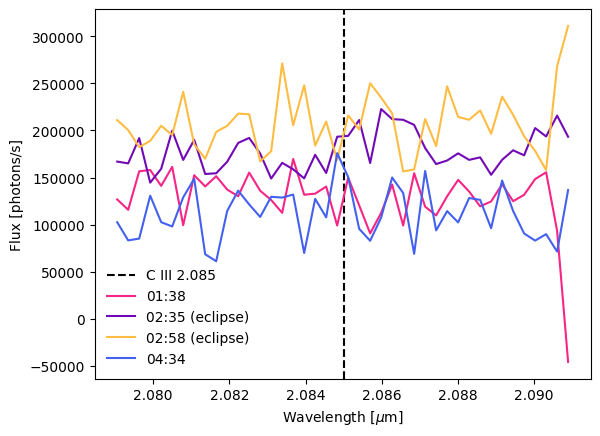

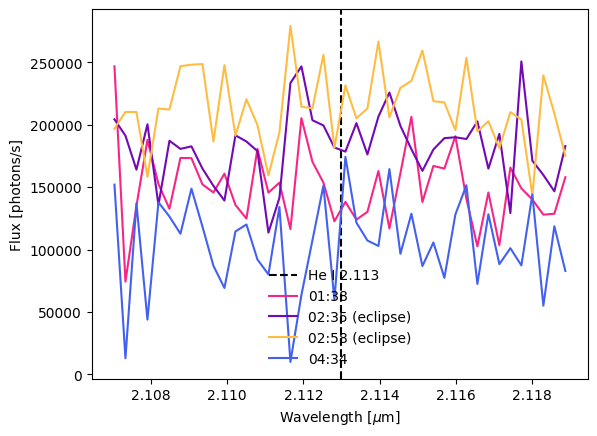

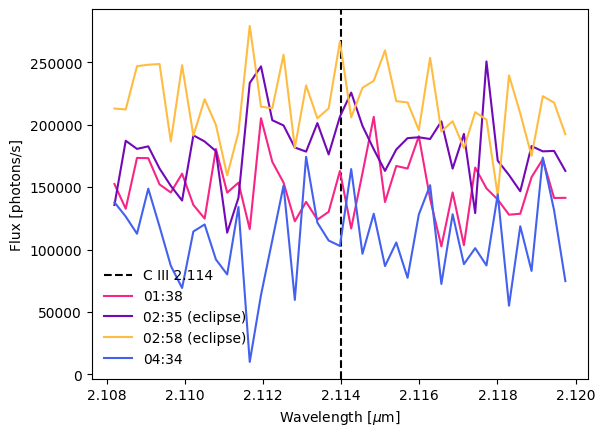

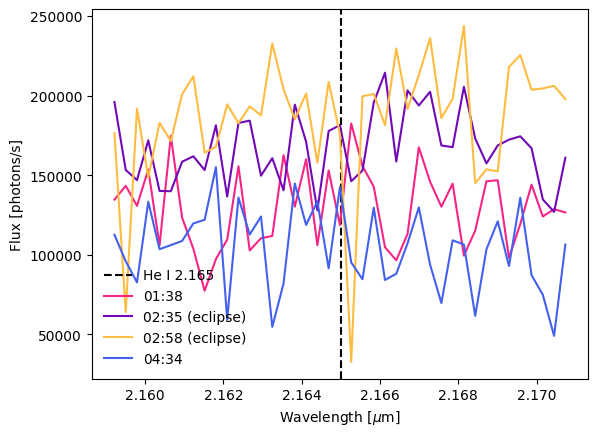

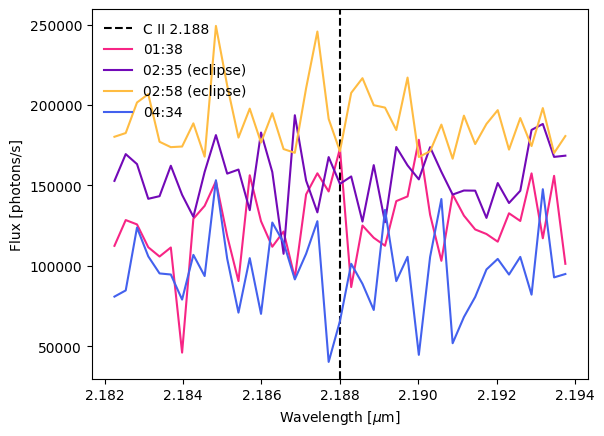

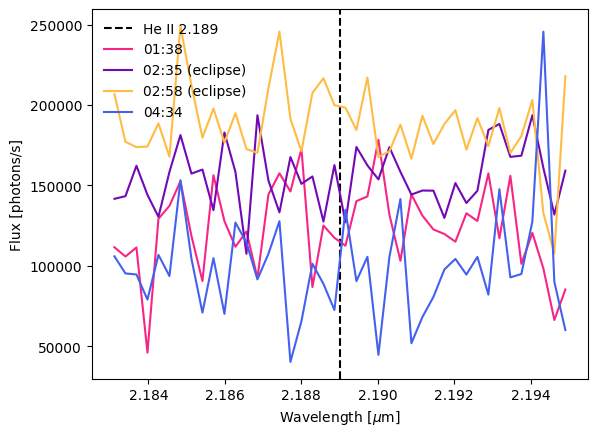

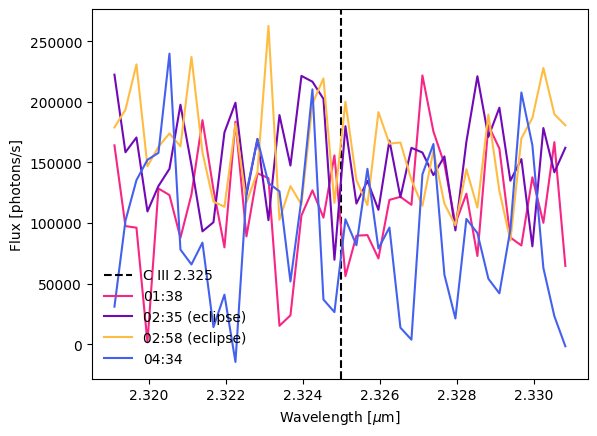

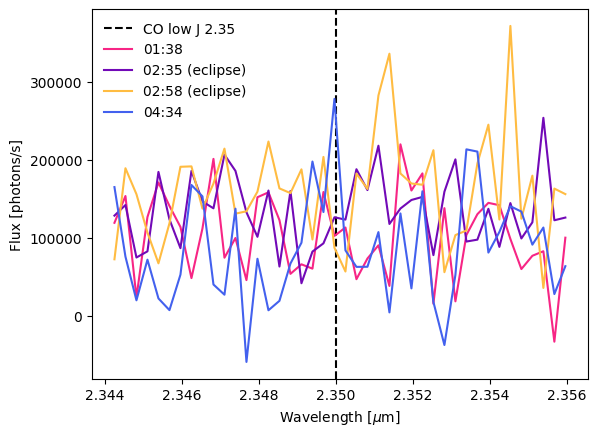

In [7]:
def plot_line(line, r=0.01):
    plt.axvline(lines[line], c='k', ls='--', label=line)
    for i, spec in enumerate(specs):
        lim = (spec[0] > lines[line] - r)*(spec[0] < lines[line] + r)
        plt.plot(spec[0][lim], spec[1][lim], c=cc[i], label=times[i])  
    plt.legend(frameon=False)
    plt.xlabel('Wavelength [$\mu$m]')
    plt.ylabel('Flux [photons/s]')
    plt.show()

for line in lines:
    plot_line(line, r=0.006)

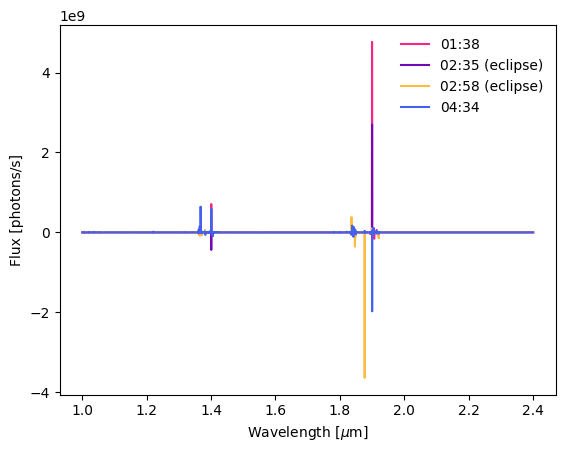

In [60]:
for i, spec in enumerate([obs0, obs1, obs2, obs3]):
    plt.plot(*spec, c=cc[i], label=times[i])  
plt.legend(frameon=False)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Flux [photons/s]')
plt.show()

# Find peaks and try to identify them

In [8]:
def plot_peak(peak, r=0.006):
    loc = obs0[0][peak]
    plt.axvline(loc, c='k', ls='--', label=f'{loc:.3f} $\mu$m')
    for i, spec in enumerate(specs):
        lim = (spec[0] > loc - r)*(spec[0] < loc + r)
        plt.plot(spec[0][lim], spec[1][lim], c=cc[i], label=times[i])  
    plt.legend(frameon=False)
    plt.xlabel('Wavelength [$\mu$m]')
    plt.ylabel('Flux [photons/s]')
    plt.show()

In [9]:
def gauss(x, a, mu, sigma, c):
    return a * np.exp(-0.5*((x-mu)/sigma)**2) + c

def integrate_line(spec, center, plot=False):
    '''Center should be an index'''
    lim = np.where((spec[0] < spec[0][center]+0.001)*(spec[0] > spec[0][center]-0.001))
    spec_lim = [spec[0][lim], spec[1][lim]]
    try:
        popt, _ = curve_fit(gauss, *spec_lim, p0=[np.max(spec_lim[1]), spec[0][center], 0.0001, 1e6])
        integral = np.trapz(gauss(spec_lim[0], *popt))
        integral -= (popt[3]*len(spec_lim[0]))
        if plot:        
            plt.plot(*spec_lim, c='c', label='data')
            plt.plot(spec_lim[0], gauss(spec_lim[0], *popt), 'k--', label='Gaussian fit')
            plt.legend(frameon=False)
            plt.show()
        return integral
    except:
        print(f'Unable to fit gaussian {center}')
        return np.NaN

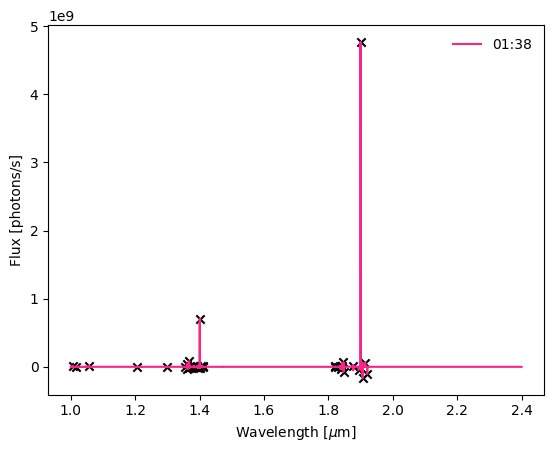

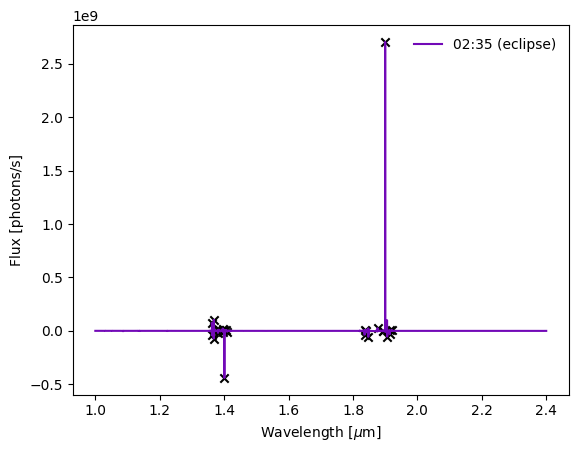

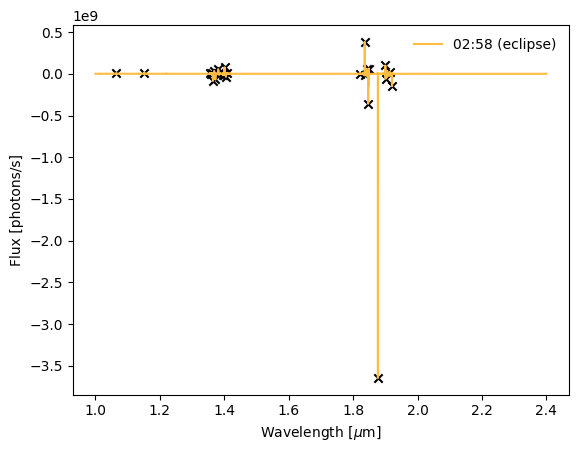

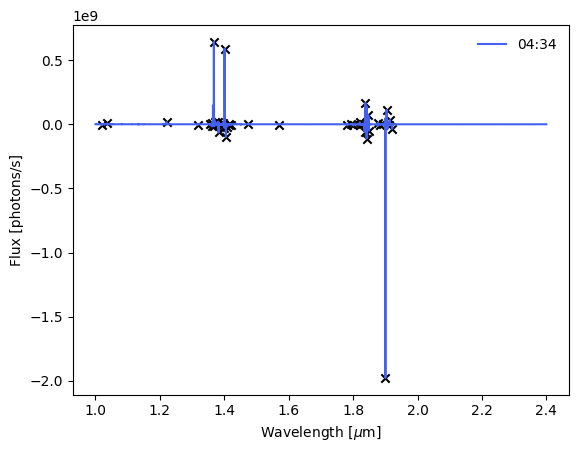

In [10]:
peaks_emit = {}
peaks_absorb = {}
peaks_emit_int = {}
peaks_absorb_int = {}
for i, spec in enumerate(specs):
    peaks_emit[i] = find_peaks(spec[1], height=10*np.median(spec[1]), distance=25)[0]
    peaks_absorb[i] = find_peaks(-spec[1], height=10*np.median(spec[1]), distance=25)[0]

    plt.plot(*spec, c=cc[i], label=times[i])
    plt.scatter(spec[0][peaks_emit[i]], spec[1][peaks_emit[i]], c='k', marker='x')
    plt.scatter(spec[0][peaks_absorb[i]], spec[1][peaks_absorb[i]], c='k', marker='x')
    plt.legend(frameon=False)
    plt.xlabel('Wavelength [$\mu$m]')
    plt.ylabel('Flux [photons/s]')
    plt.show()

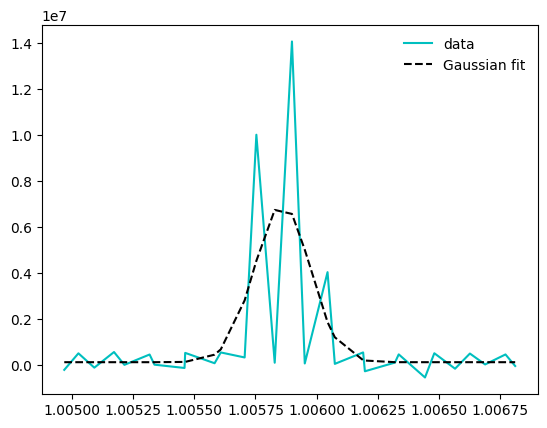

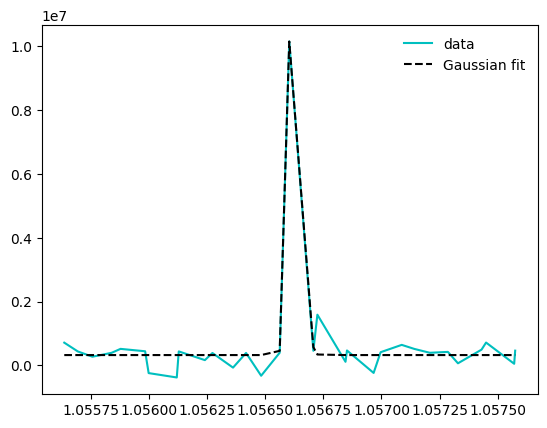

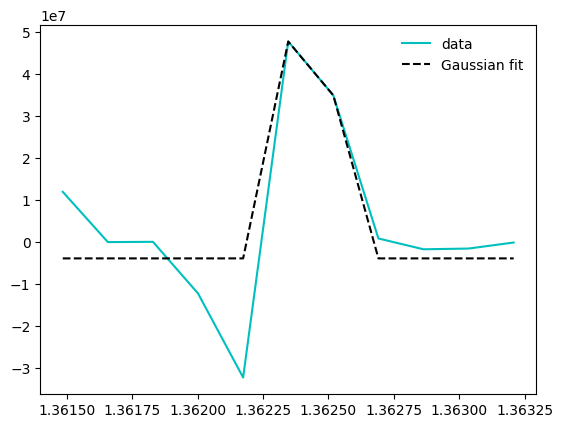

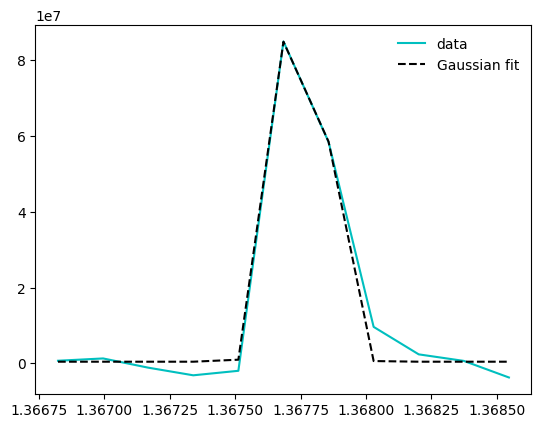

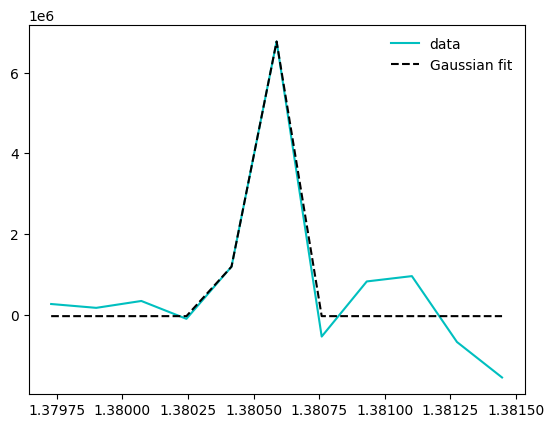

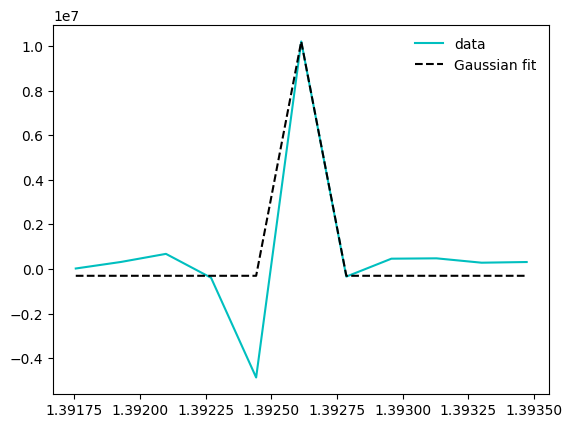

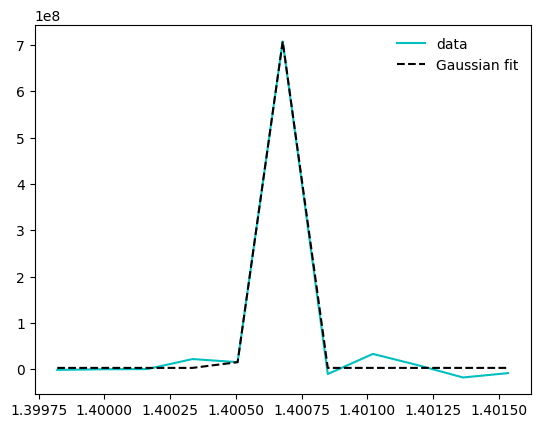

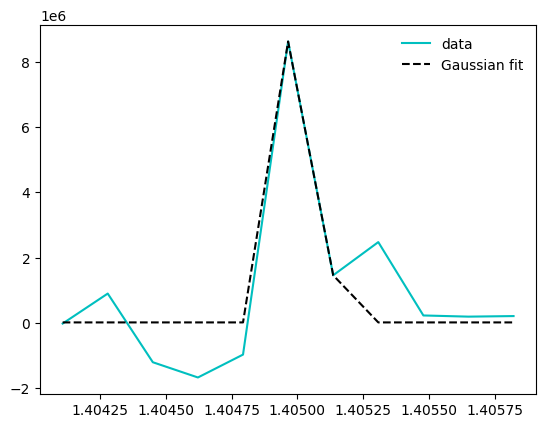

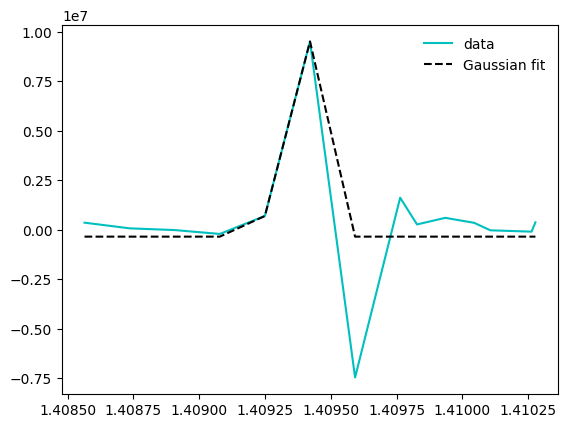

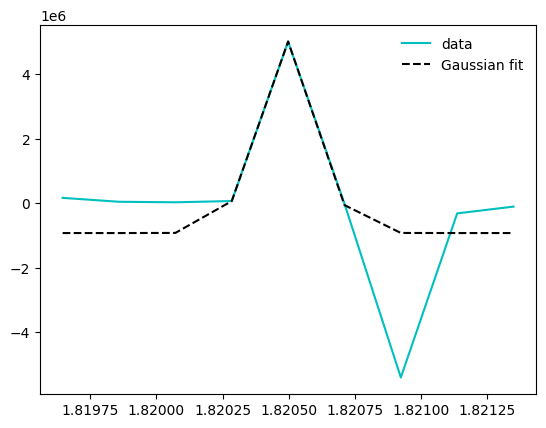

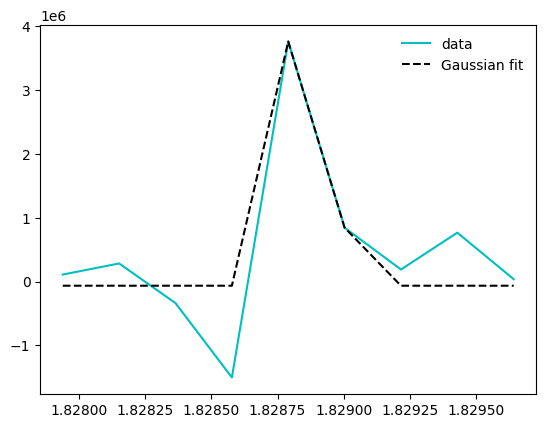

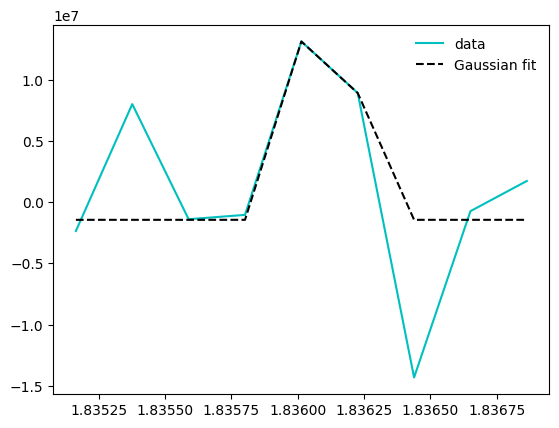

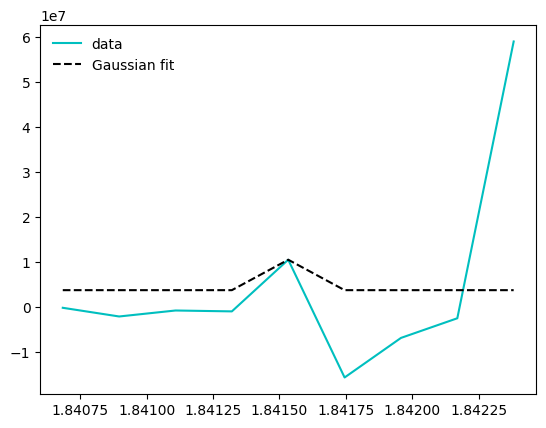

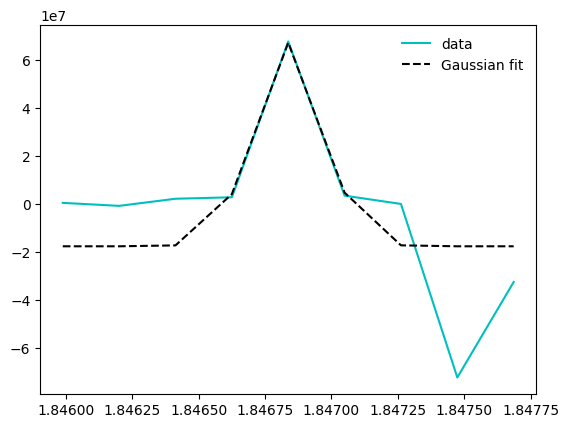

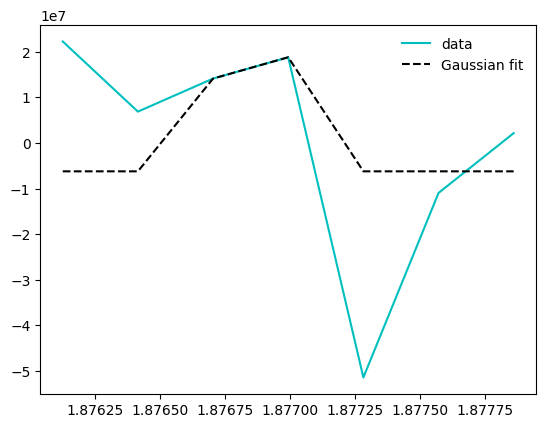

Unable to fit gaussian 6348


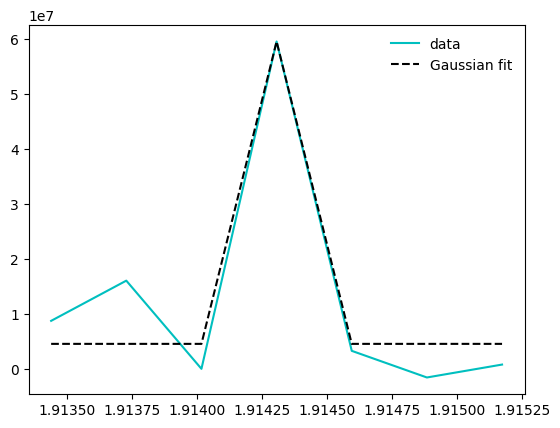

Unable to fit gaussian 259


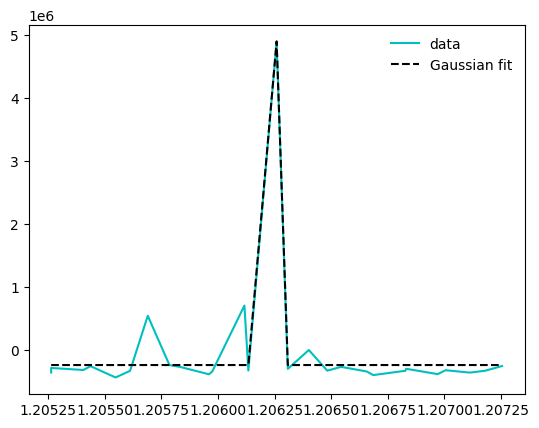

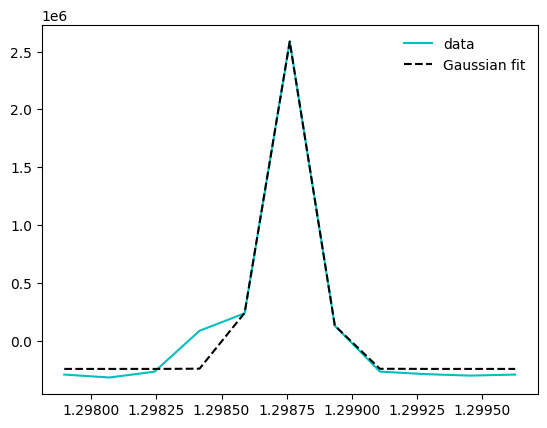

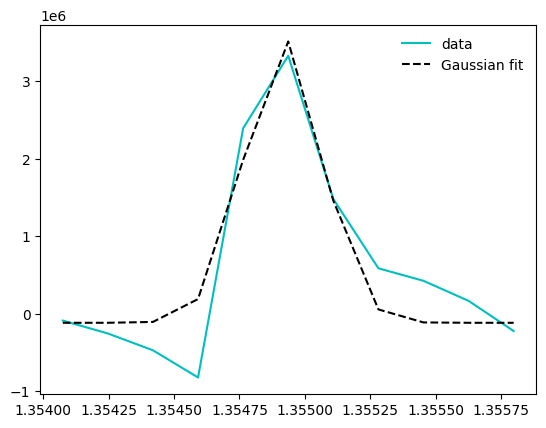

/home/beryl/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


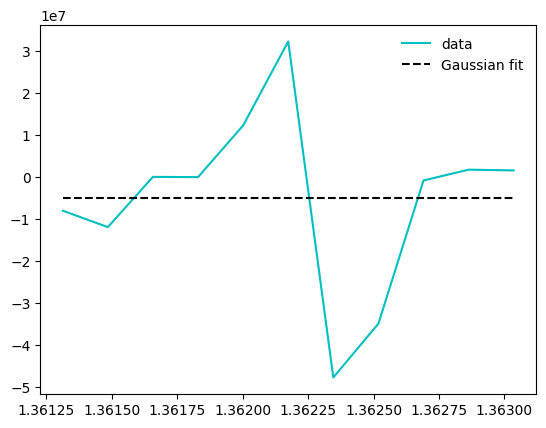

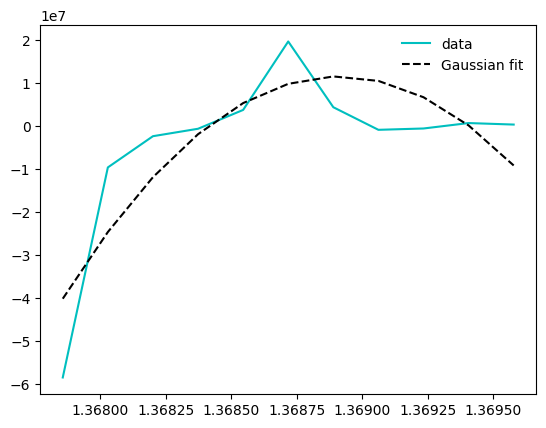

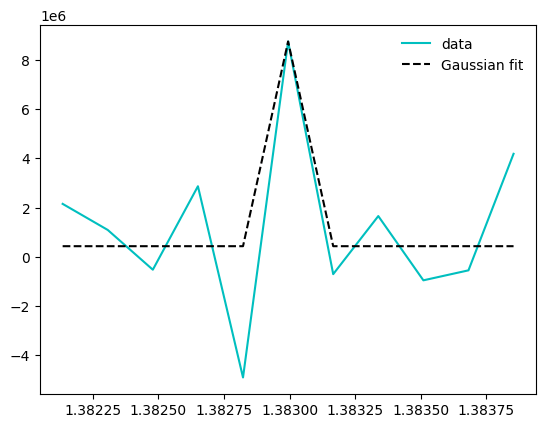

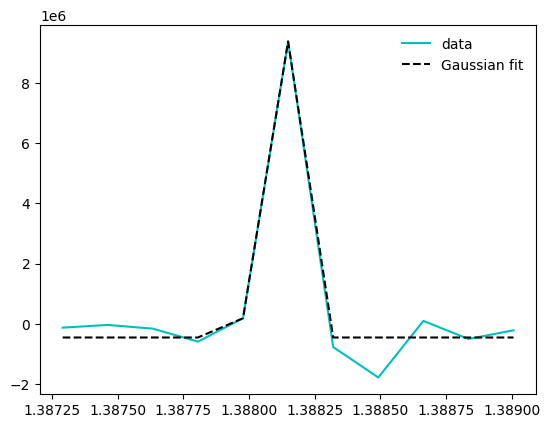

/home/beryl/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


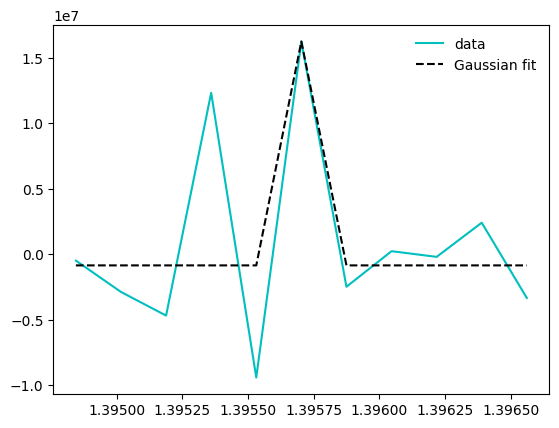

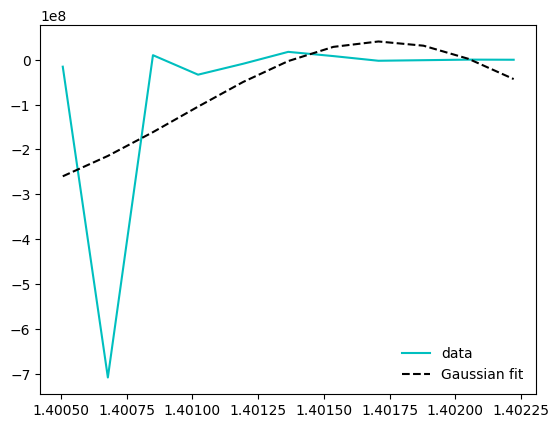

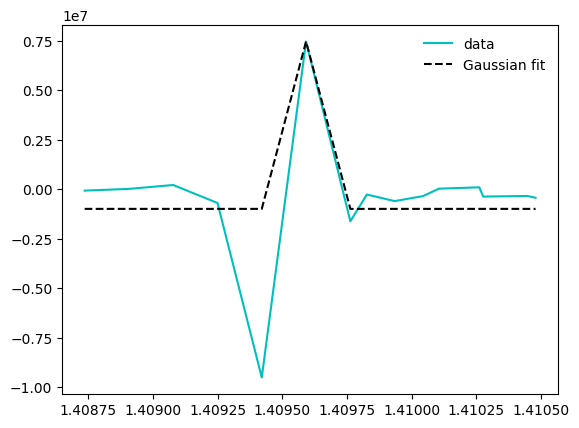

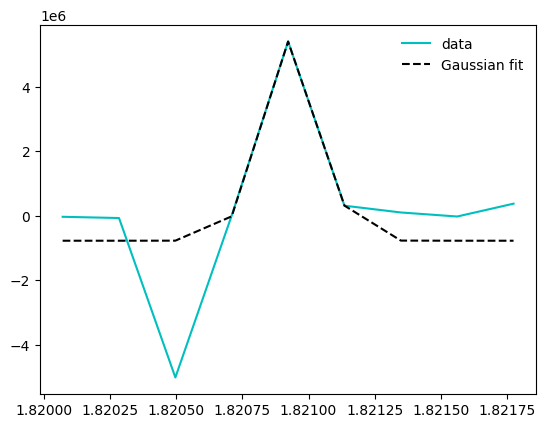

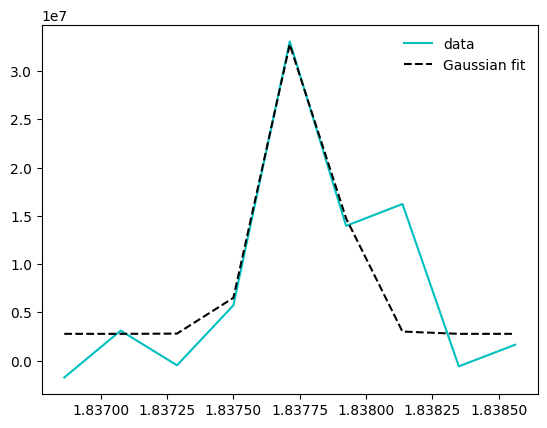

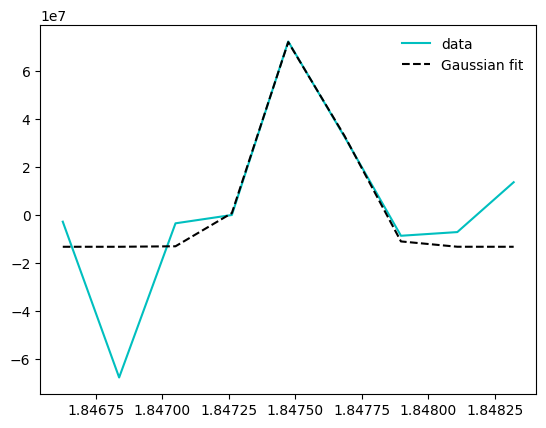

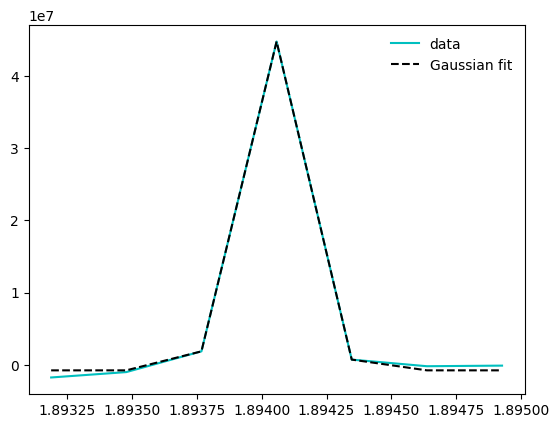

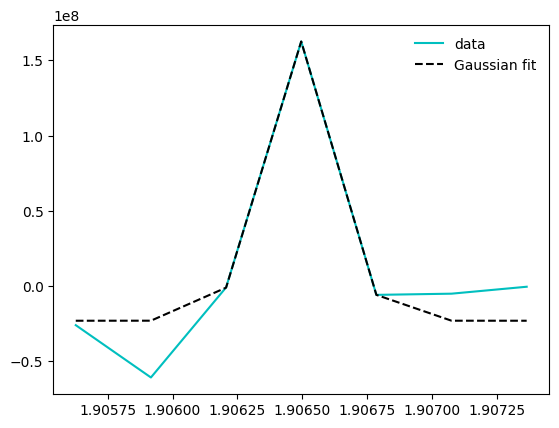

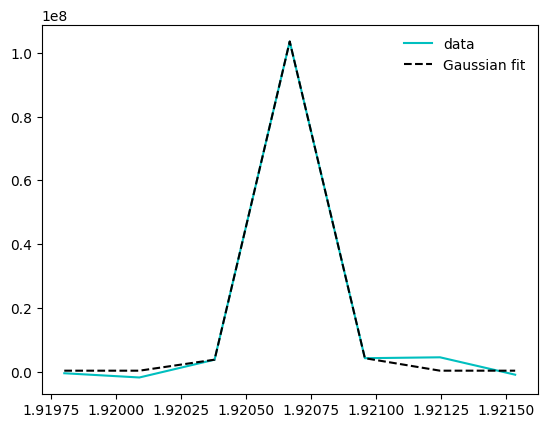

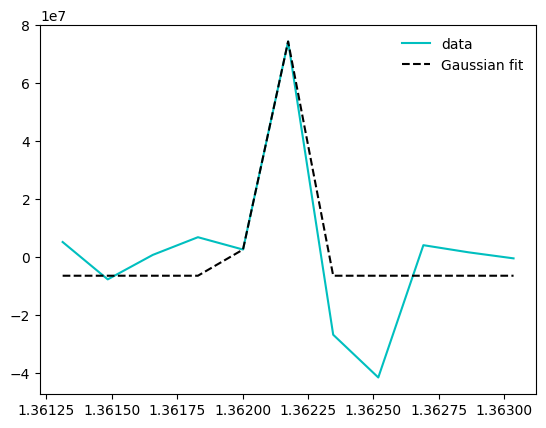

/home/beryl/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


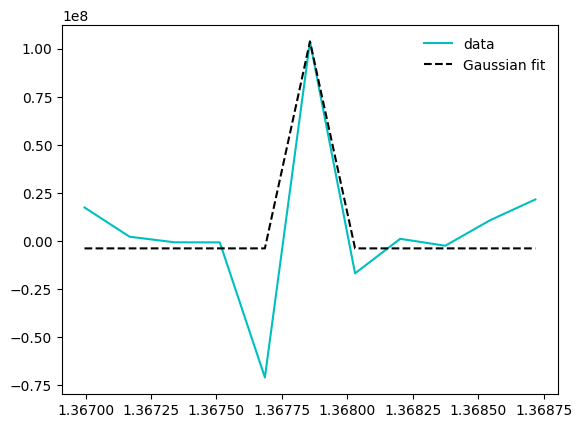

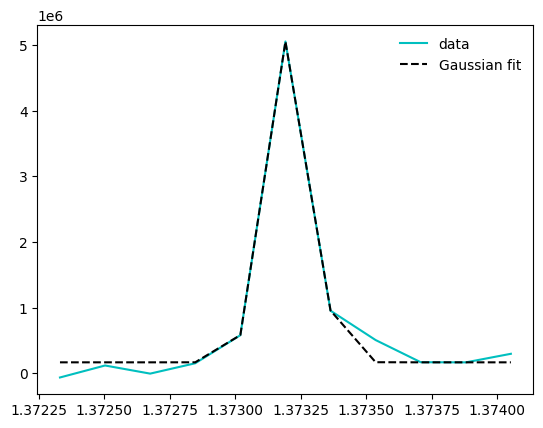

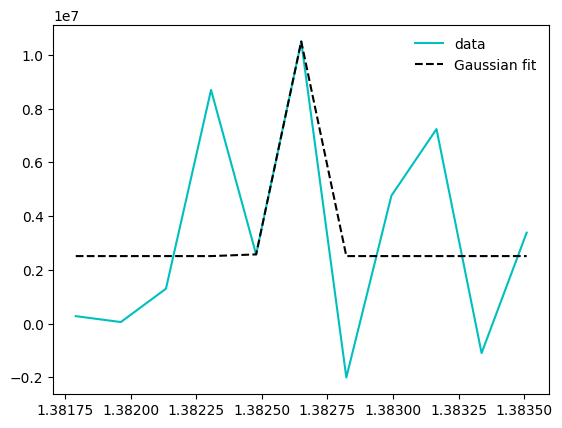

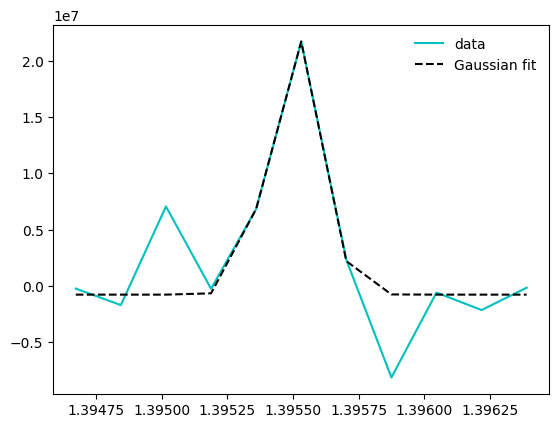

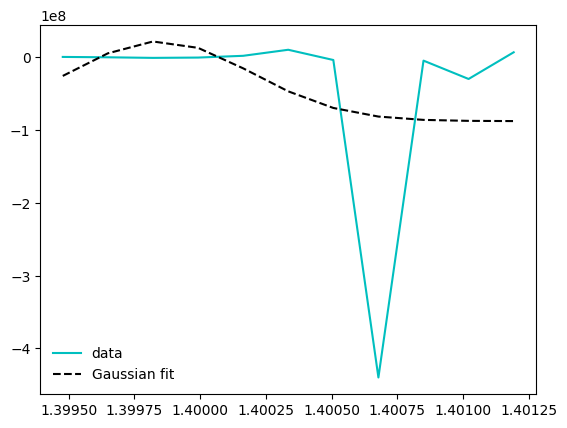

/home/beryl/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


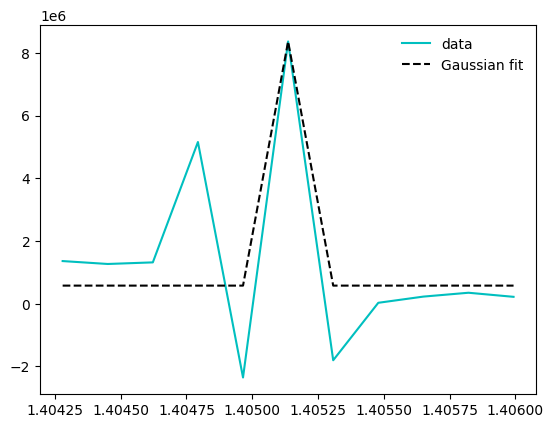

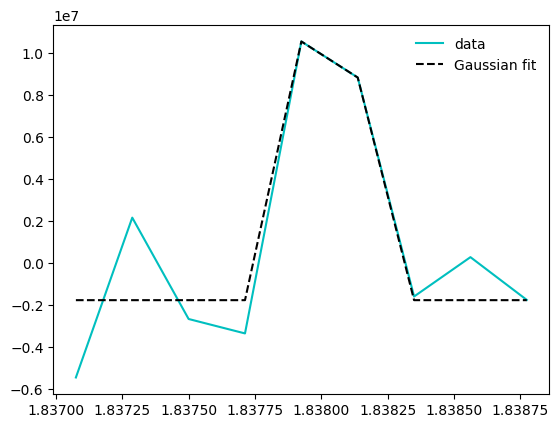

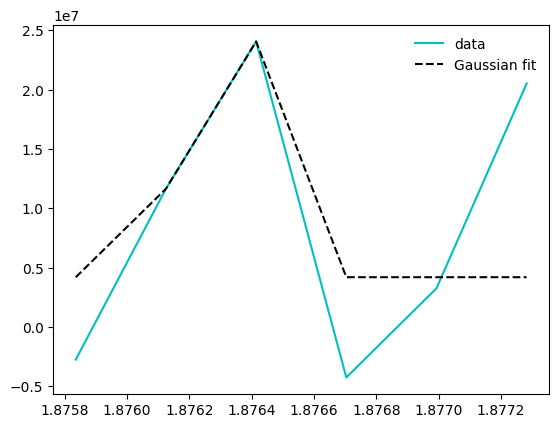

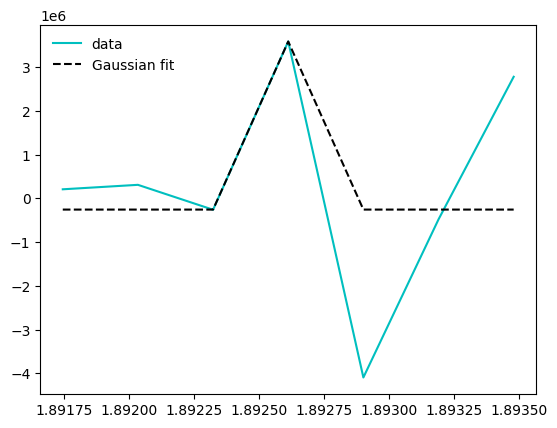

Unable to fit gaussian 6348


/home/beryl/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


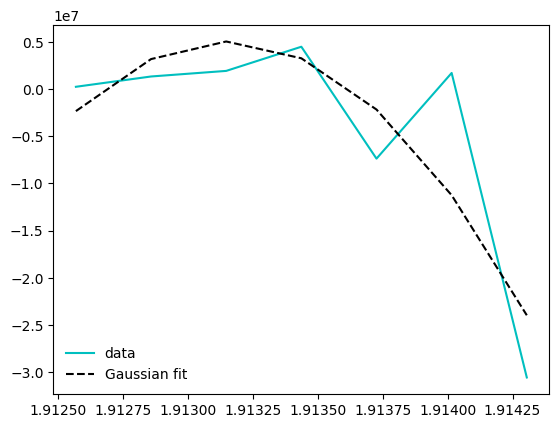

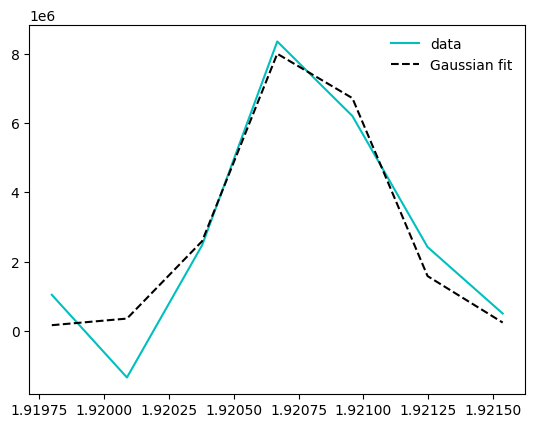

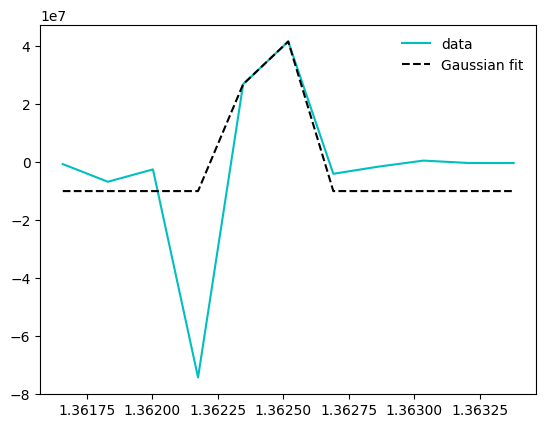

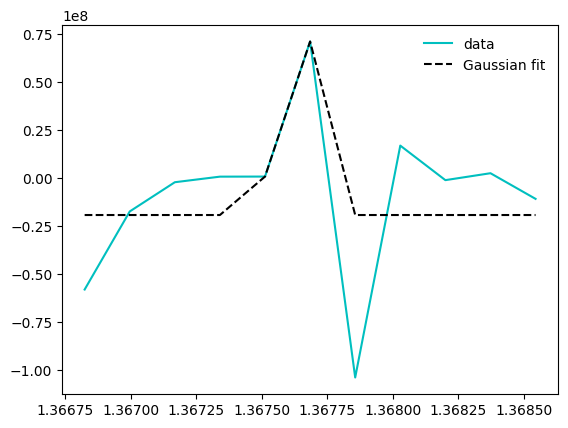

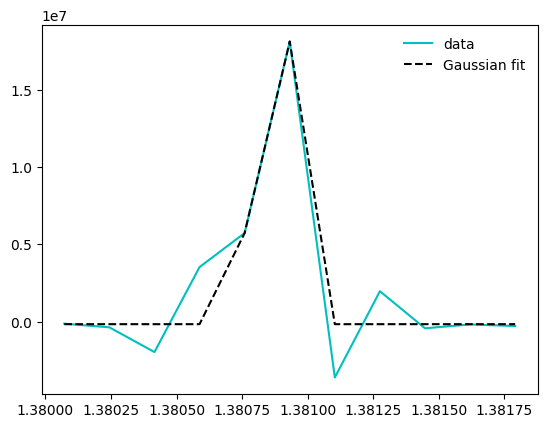

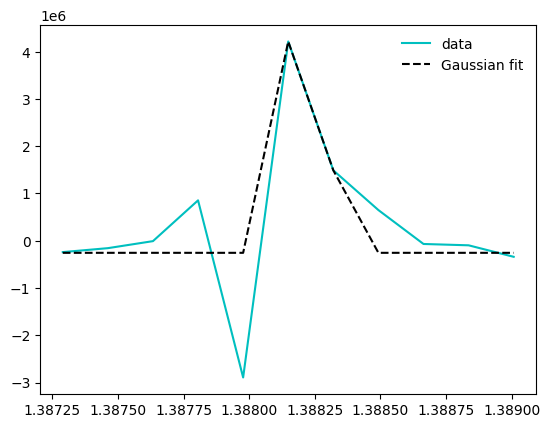

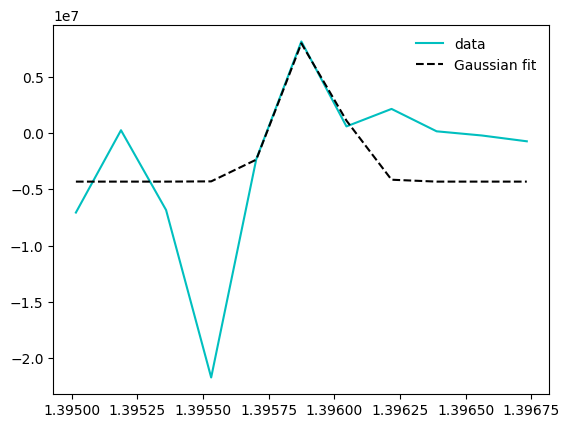

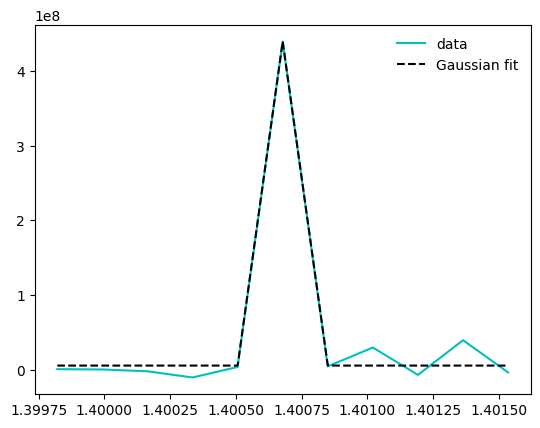

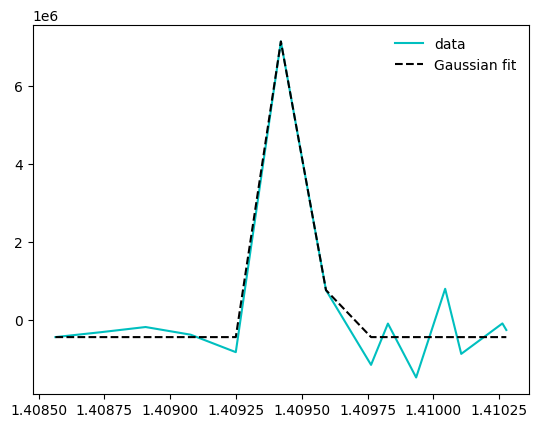

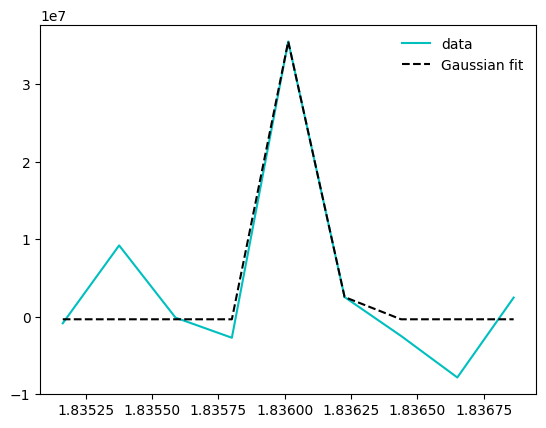

Unable to fit gaussian 6217


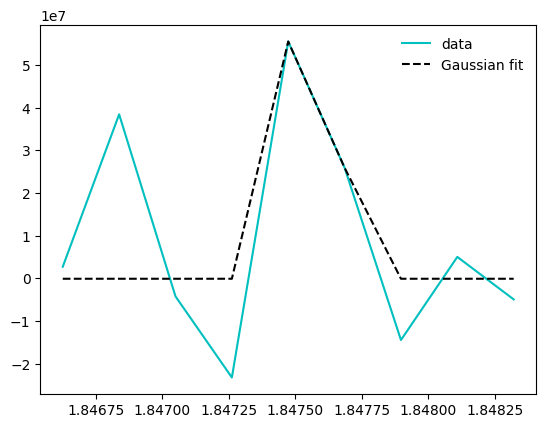

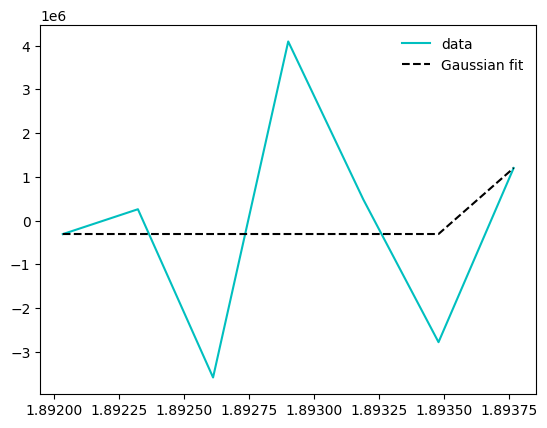

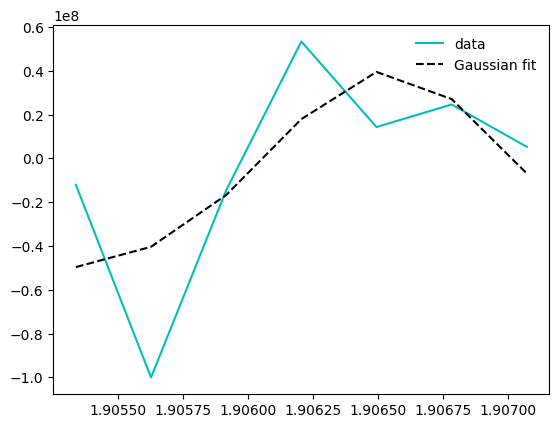

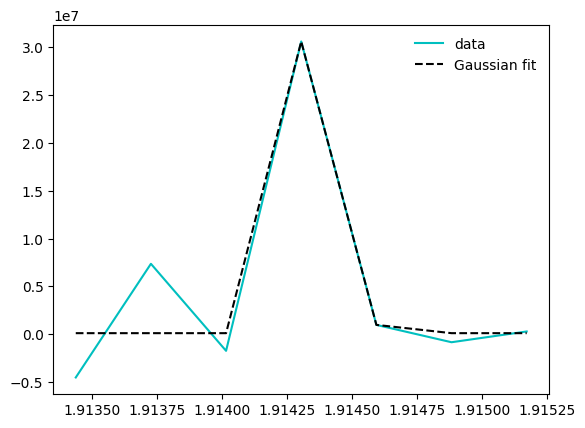

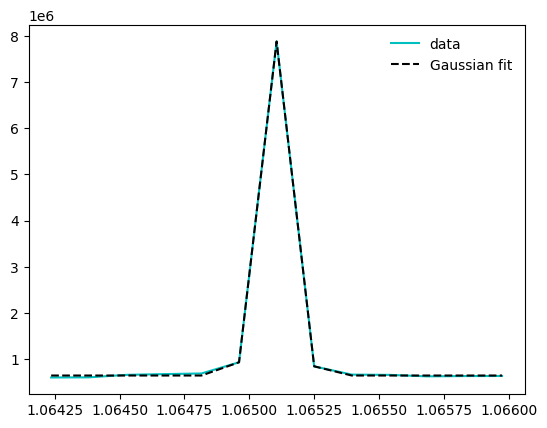

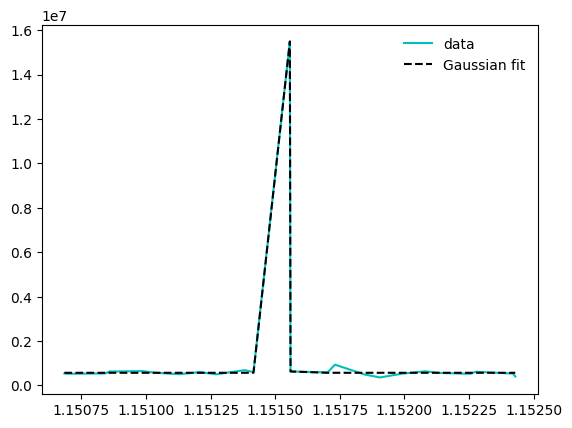

/home/beryl/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


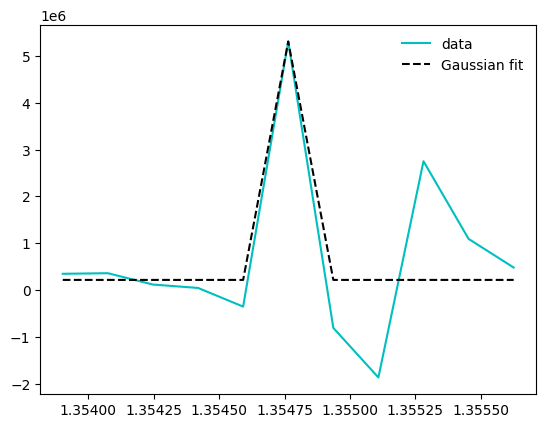

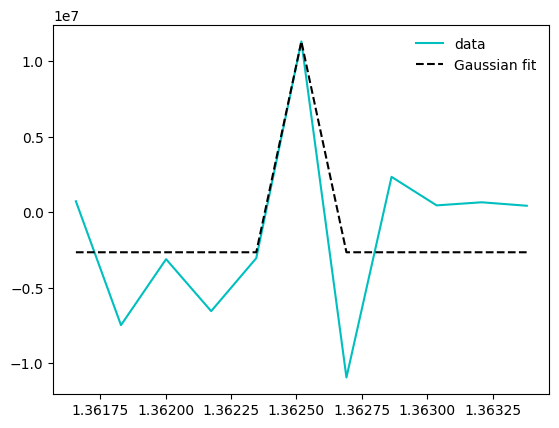

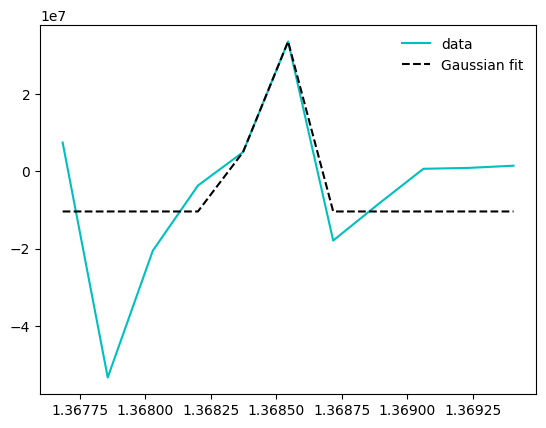

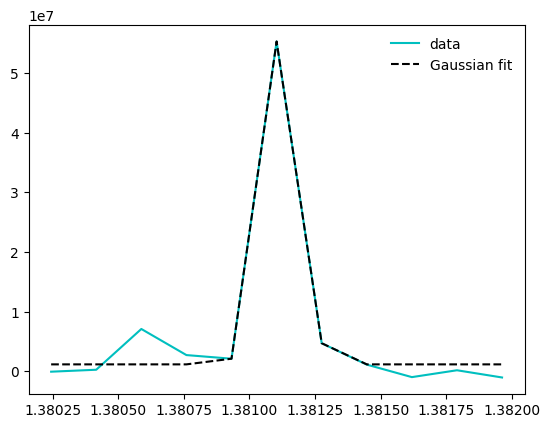

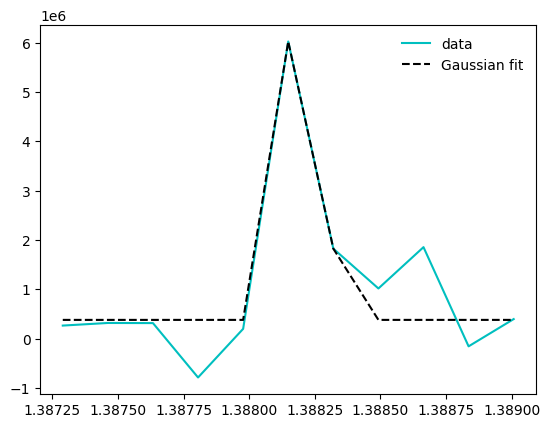

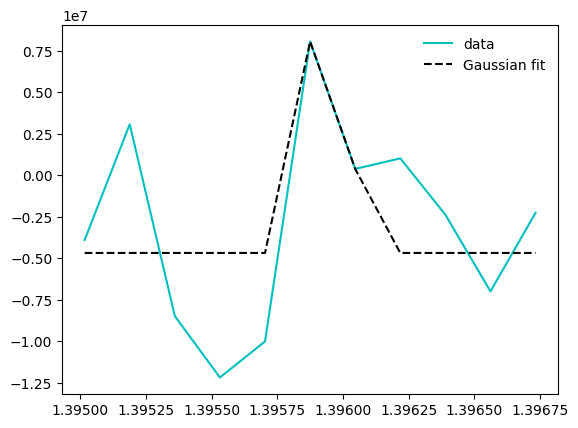

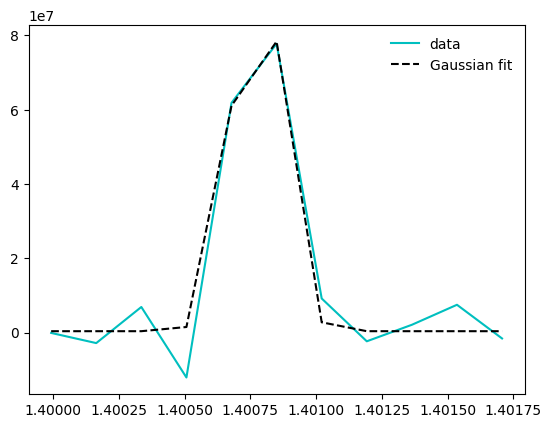

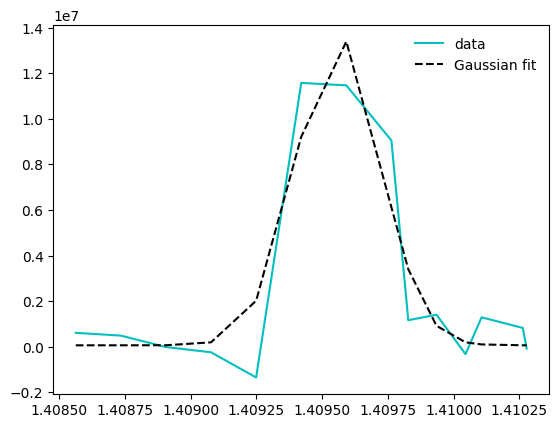

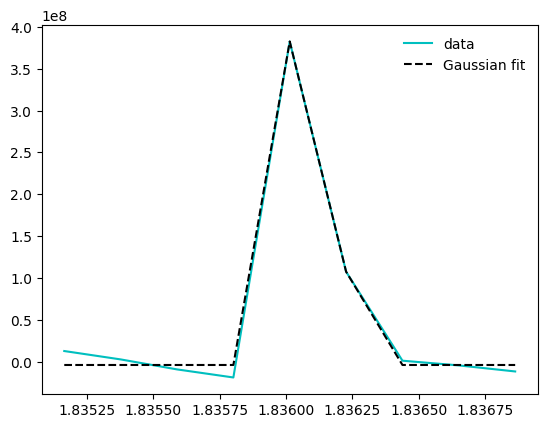

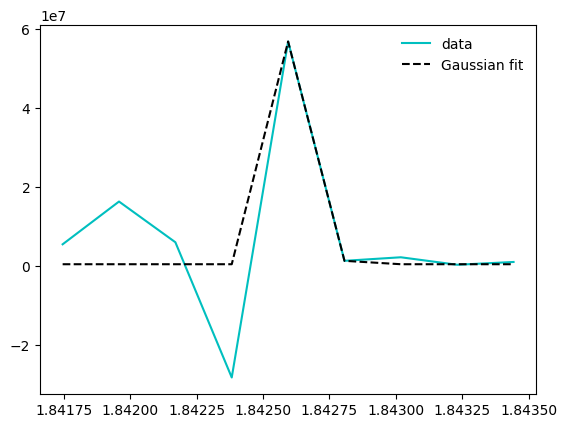

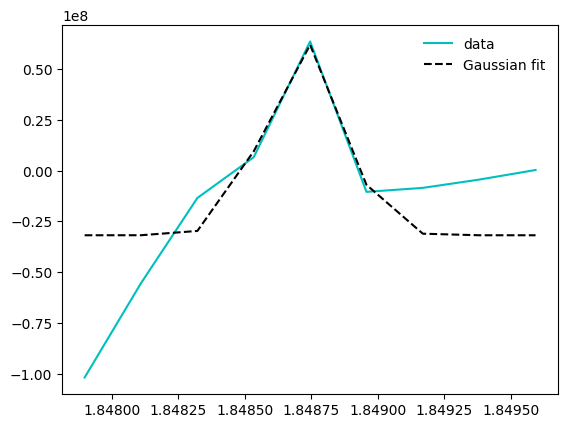

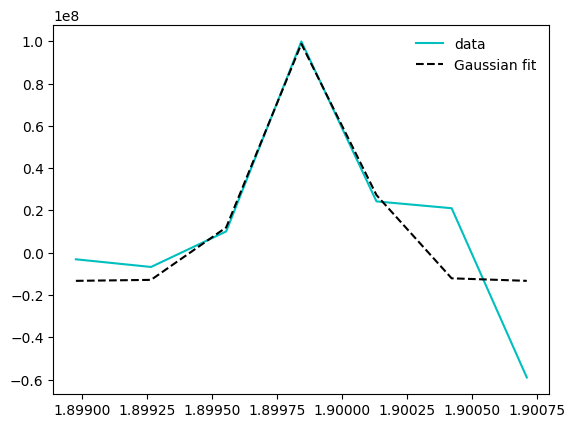

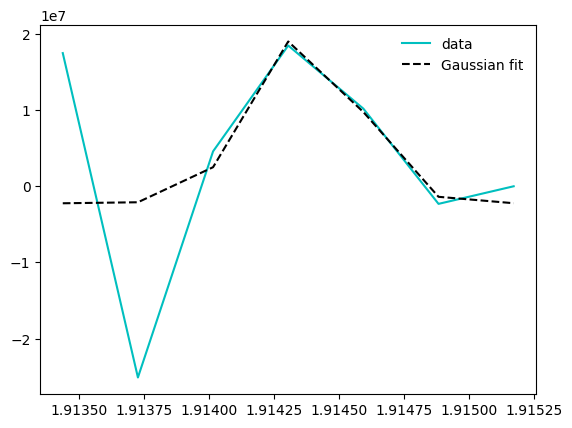

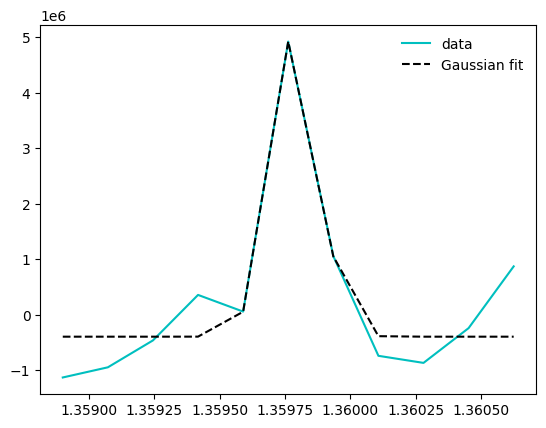

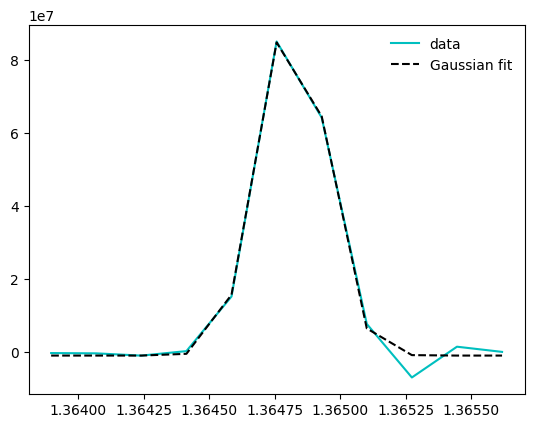

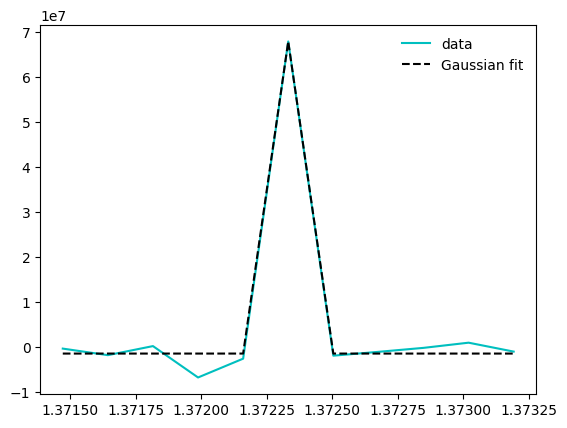

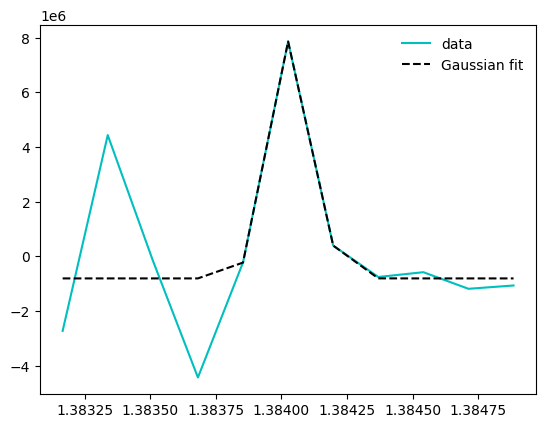

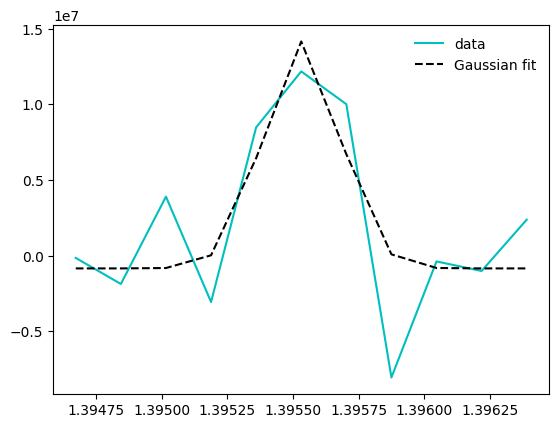

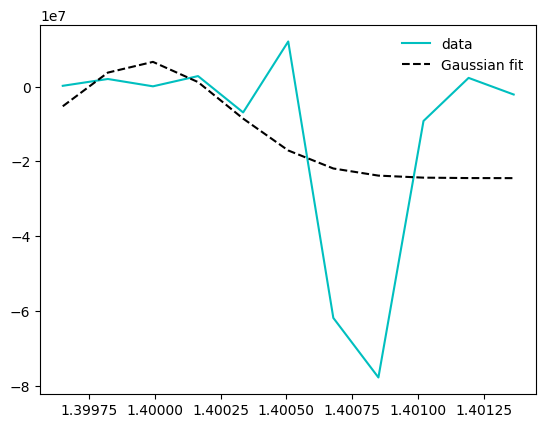

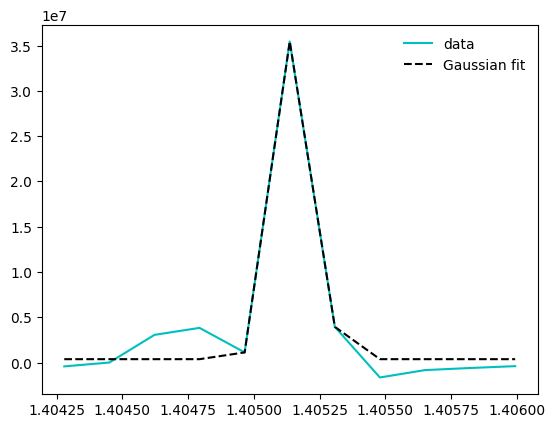

/home/beryl/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


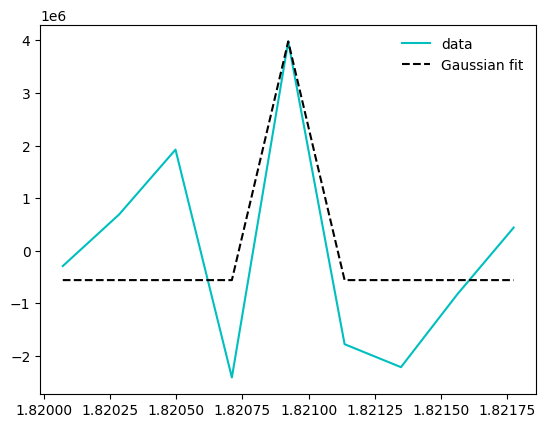

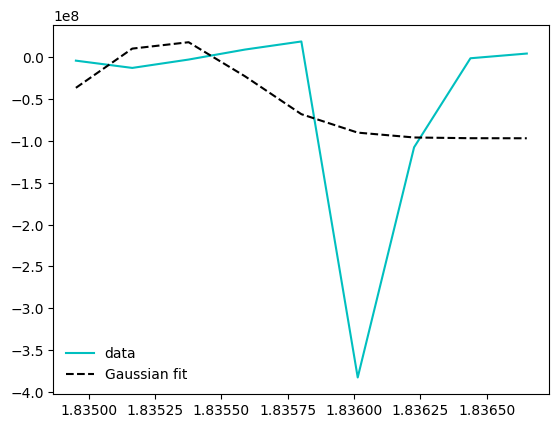

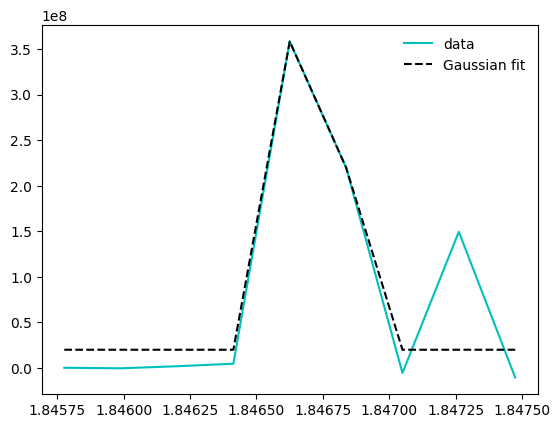

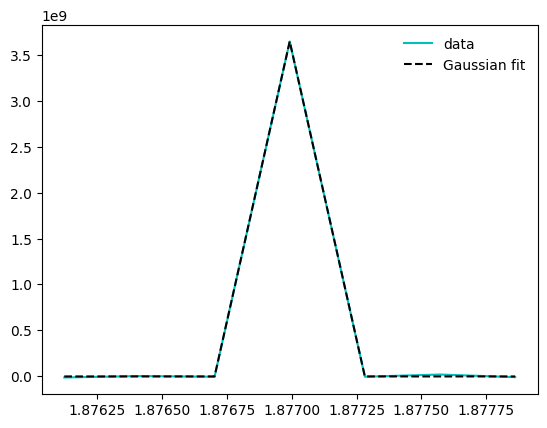

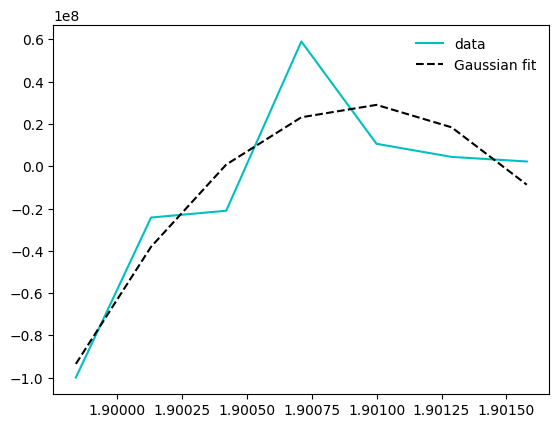

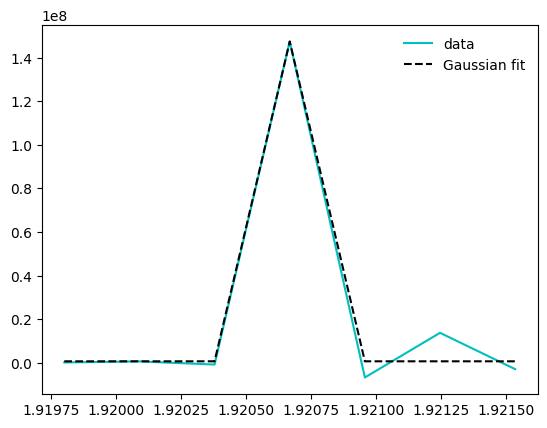

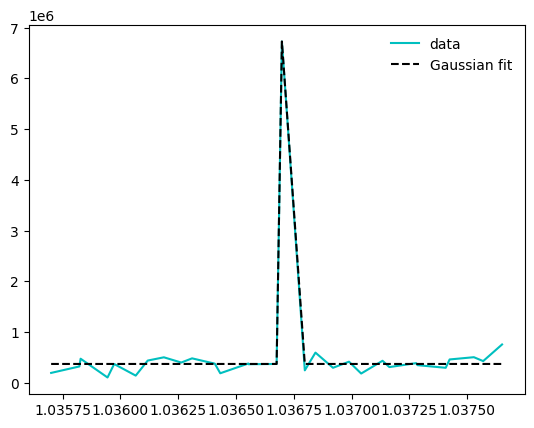

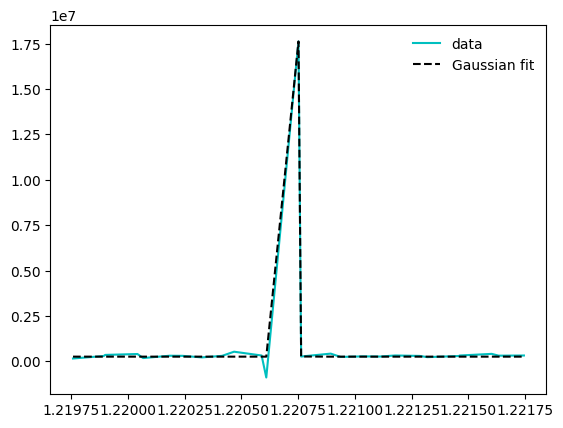

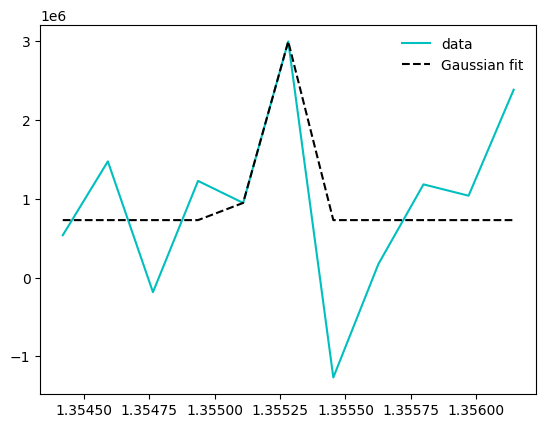

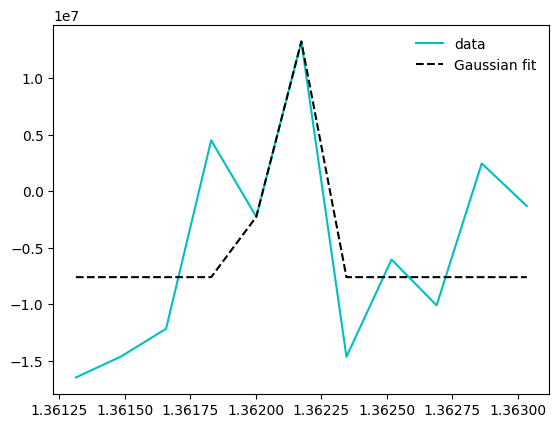

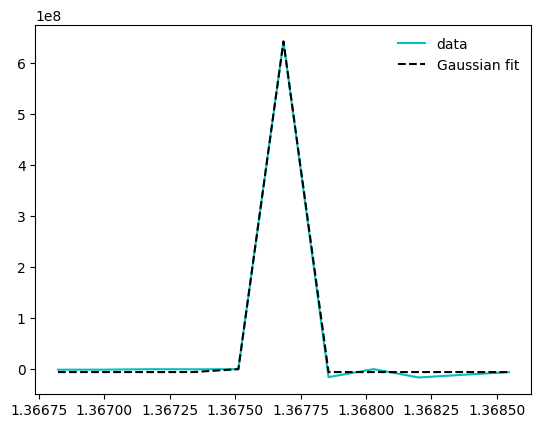

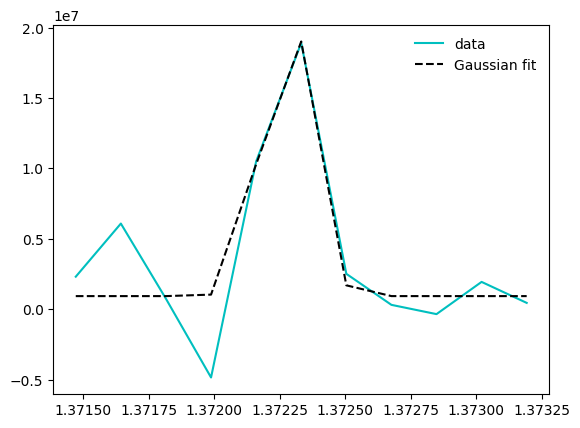

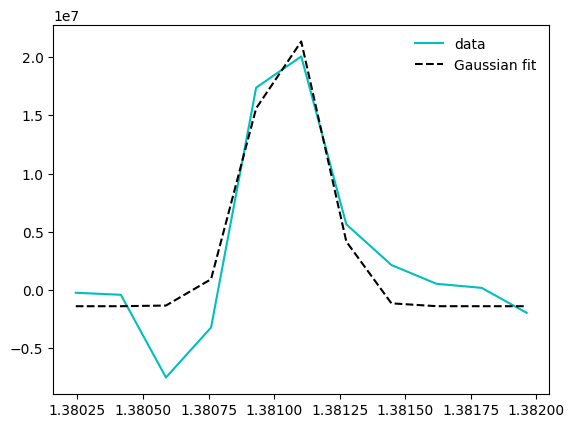

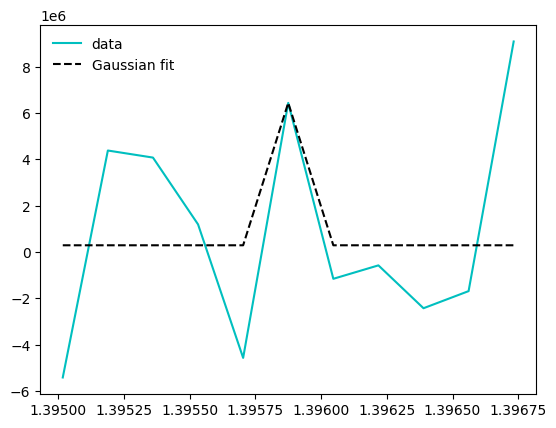

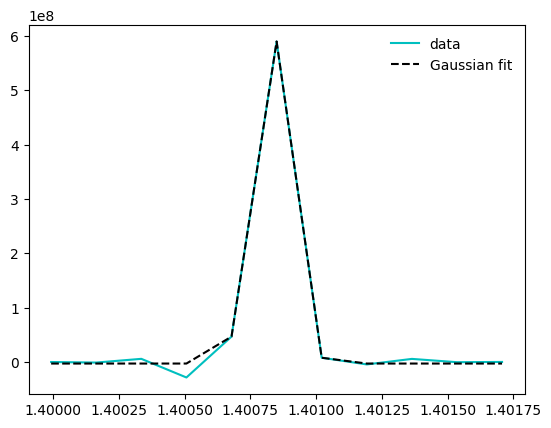

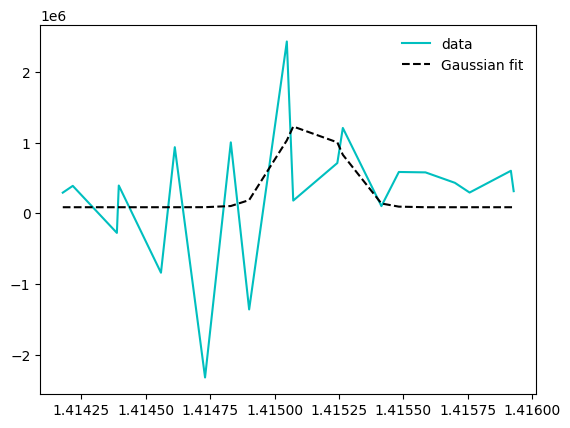

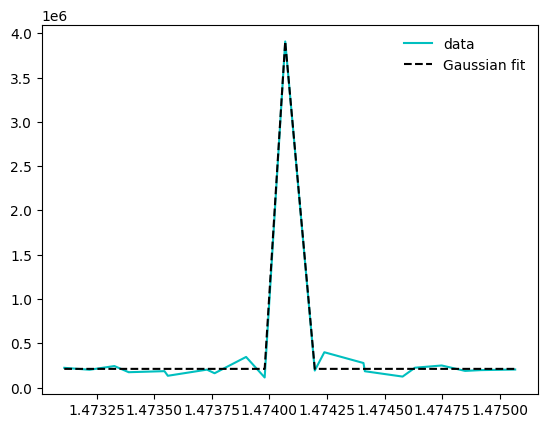

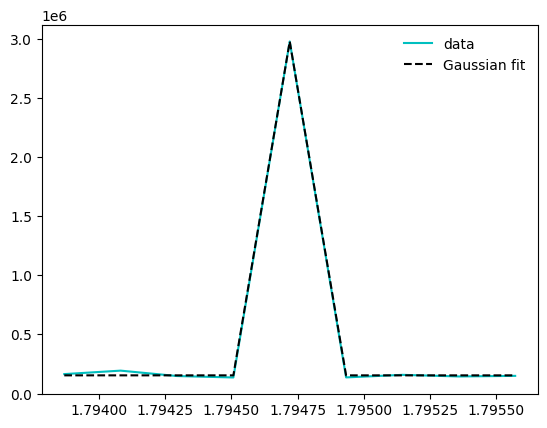

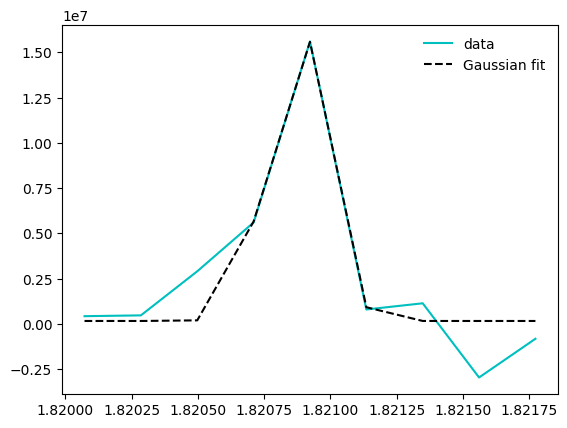

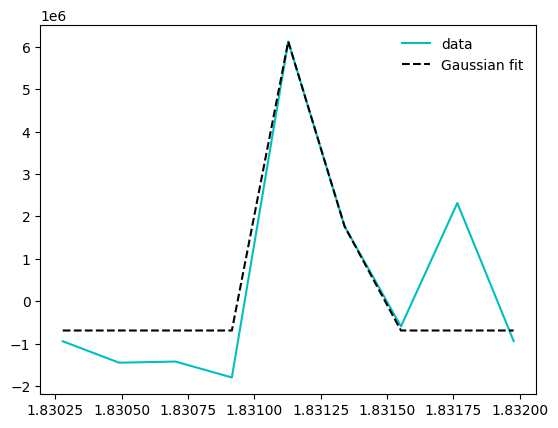

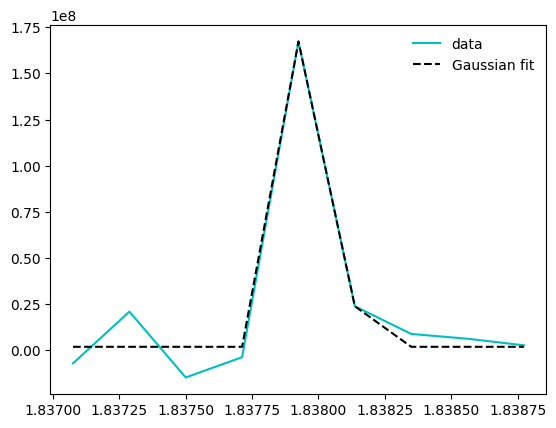

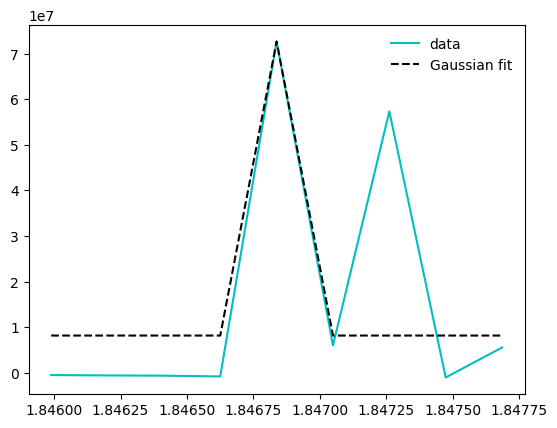

/home/beryl/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


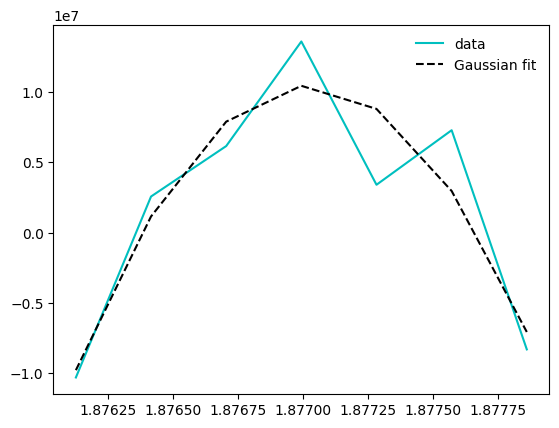

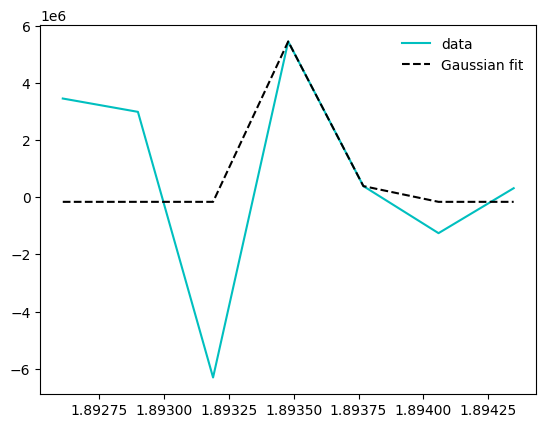

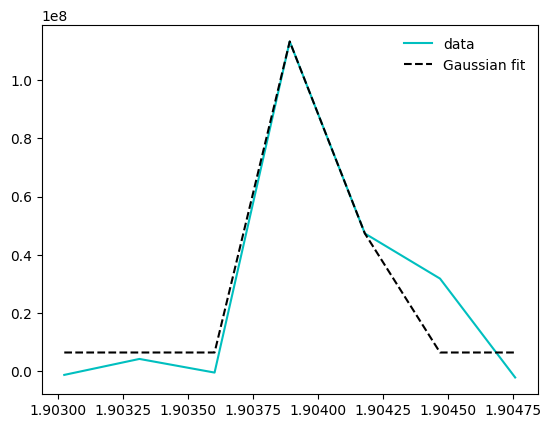

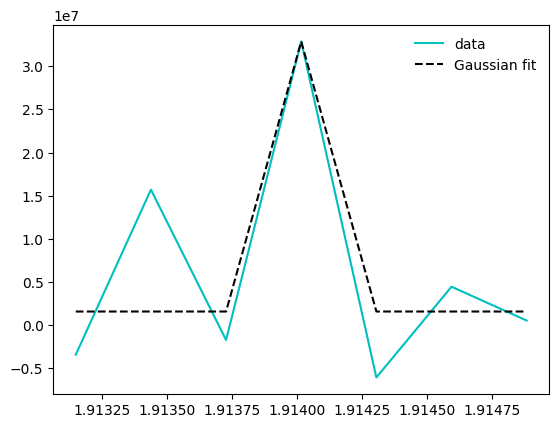

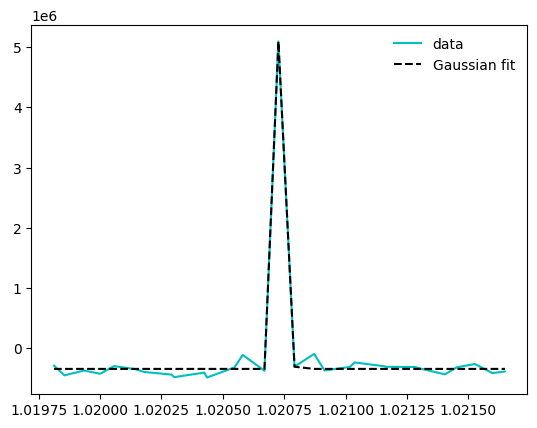

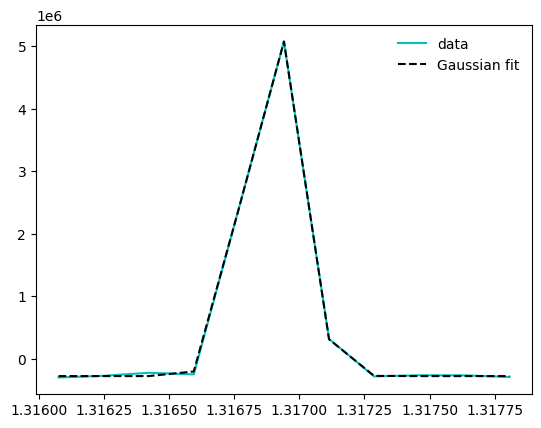

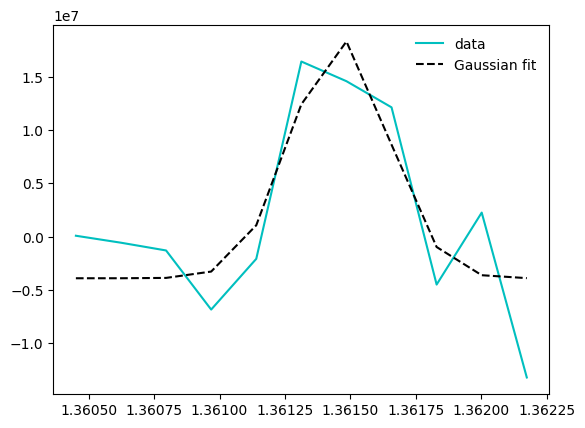

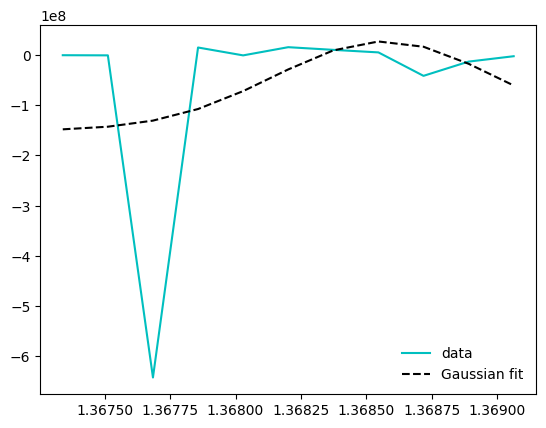

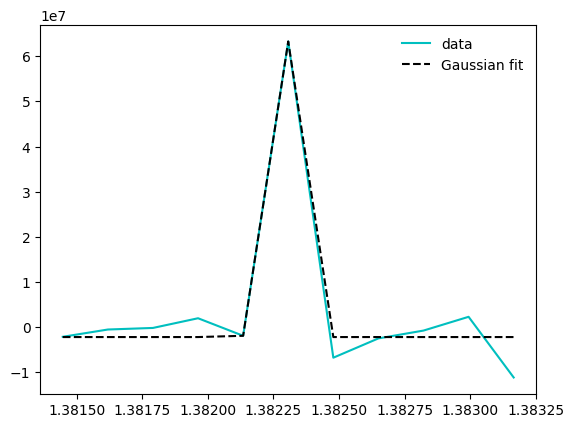

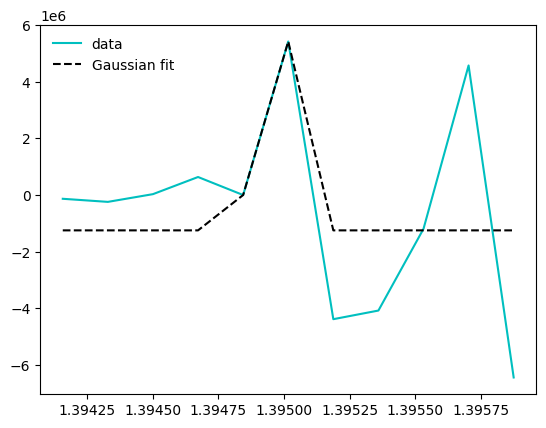

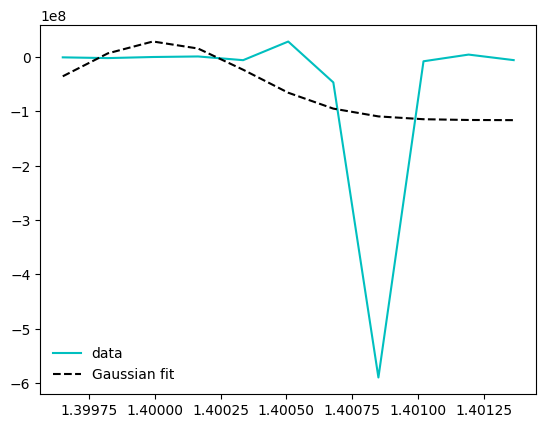

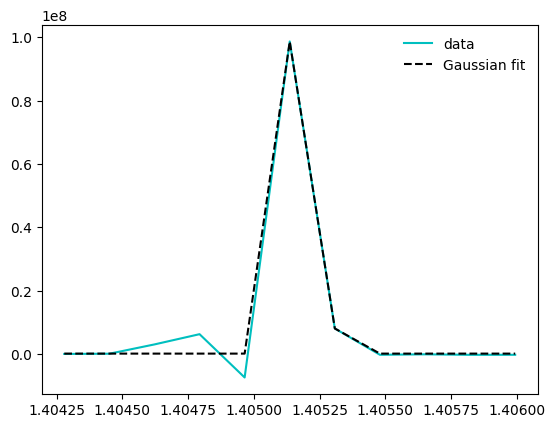

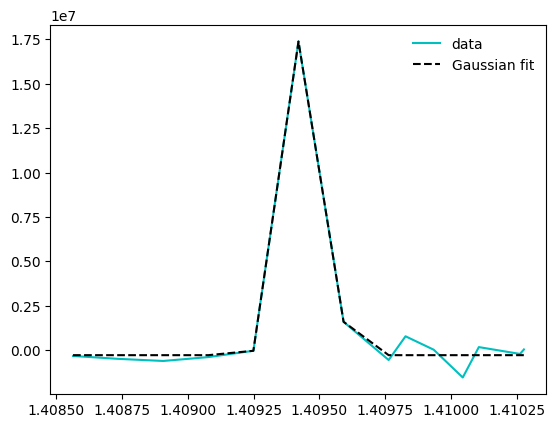

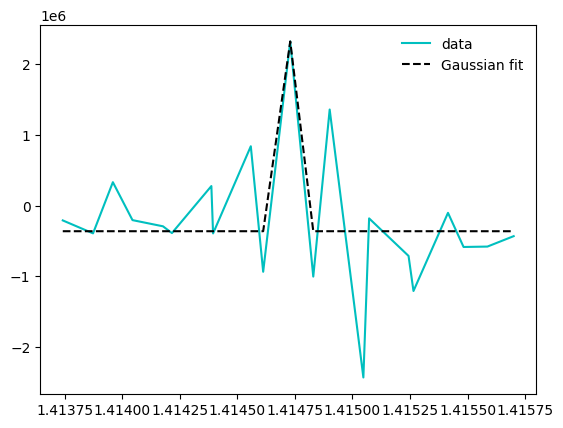

Unable to fit gaussian 3885


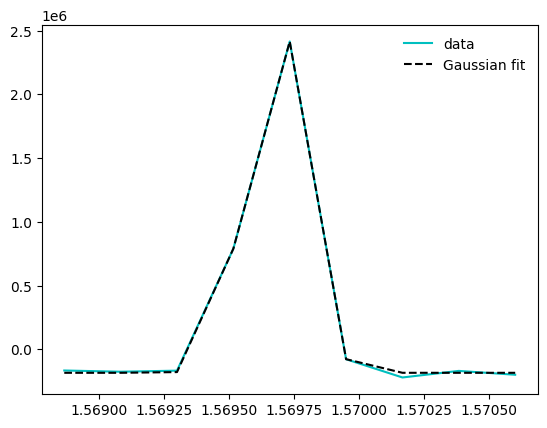

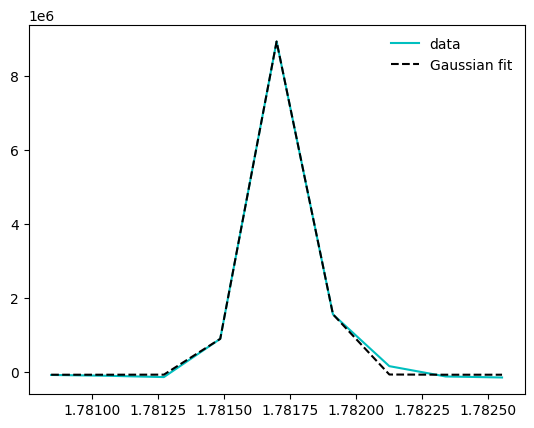

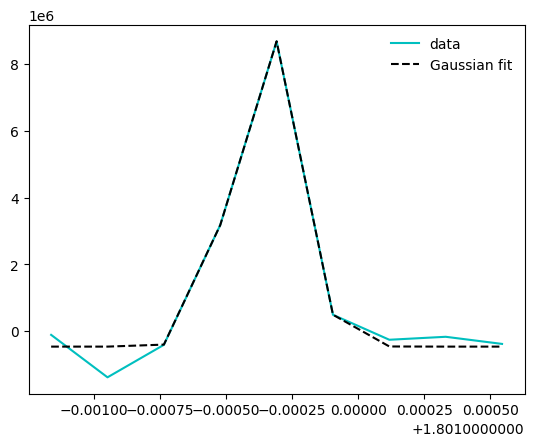

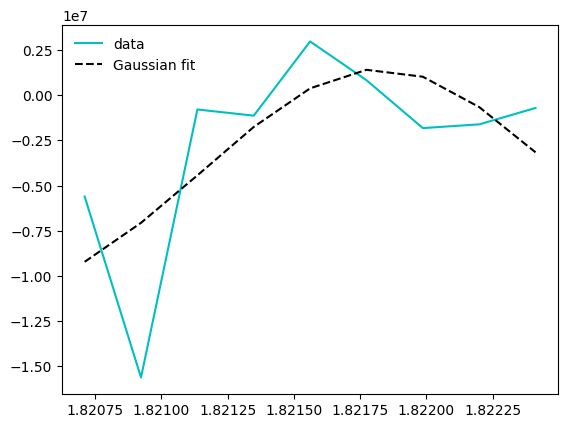

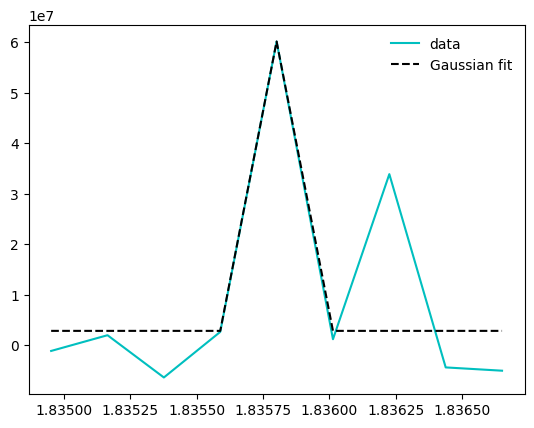

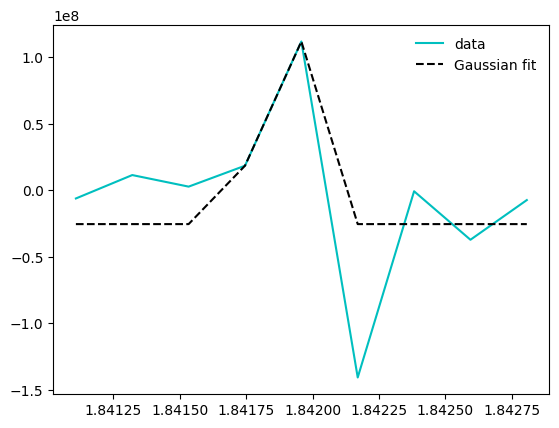

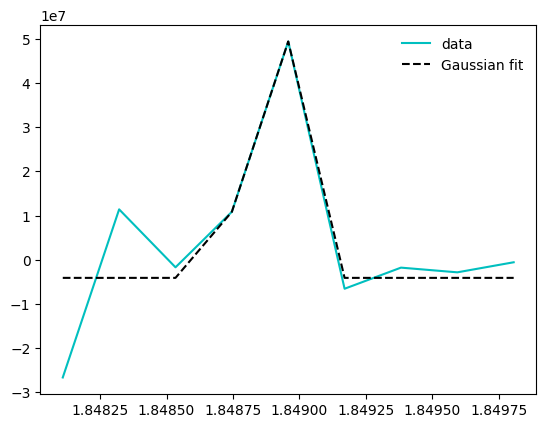

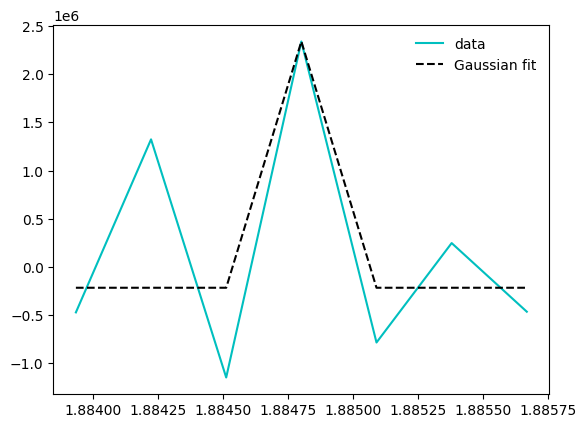

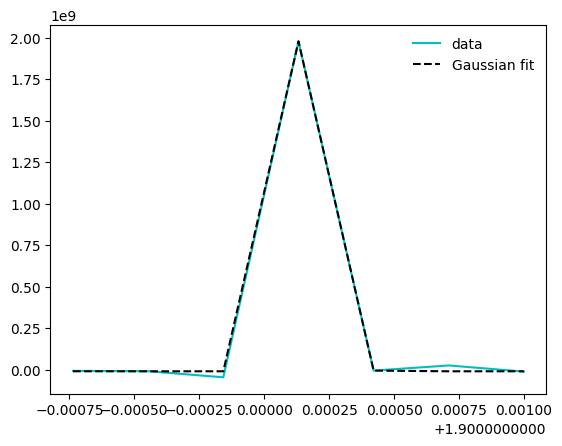

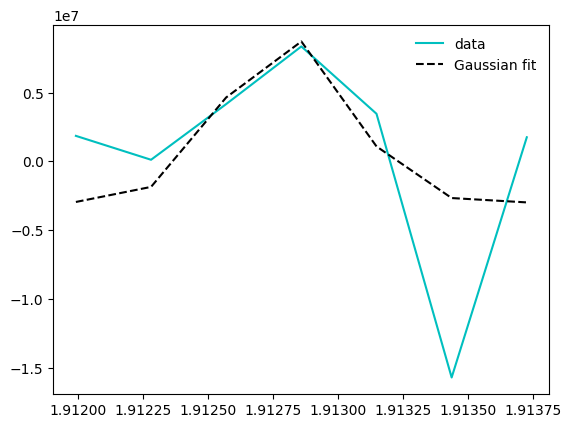

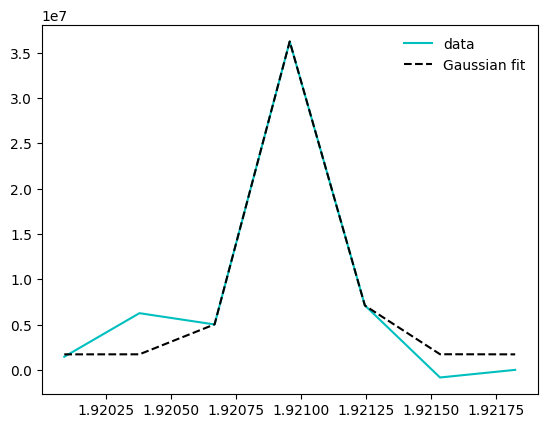

In [12]:
for i, spec in enumerate(specs):
    em = find_peaks(spec[1], height=10*np.median(spec[1]), distance=25)[0]
    ab = find_peaks(-spec[1], height=10*np.median(spec[1]), distance=25)[0]
    
#     if i==0:
#         peaks_emit[i] = np.delete(em, [12, 14, 15])
#         peaks_absorb[i] = np.delete(ab, [0, 4, 5, 9])
#     if i==1:
#         peaks_emit[i] = np.delete(em, [5, 10, 11])
#         peaks_absorb[i] = np.delete(ab, [8, 10, 11])
#     if i==2:
#         peaks_emit[i] = em
#         peaks_absorb[i] = np.delete(ab, [5, 8, 11])
#     if i==3:
#         peaks_emit[i] = np.delete(em, [9, 16])
#         peaks_absorb[i] = np.delete(ab, [3, 6, 10, 14])

    peaks_emit[i] = em
    peaks_absorb[i] = ab
    
    ints_emit = np.zeros(len(peaks_emit[i]))
    for j, peak in enumerate(peaks_emit[i]):
        ints_emit[j] = integrate_line(spec, peak, plot=True)
    
    ints_absorb = np.zeros(len(peaks_absorb[i]))
    for j, peak in enumerate(peaks_absorb[i]):
        ints_absorb[j] = integrate_line([spec[0], -spec[1]], peak, plot=True)
        
    peaks_emit_int[i] = ints_emit
    peaks_absorb_int[i] = ints_absorb

for i in peaks_emit:
    peaks_emit[i] = specs[i][0][peaks_emit[i]]
for i in peaks_absorb:
    peaks_absorb[i] = specs[i][0][peaks_absorb[i]]

# Try working with the median of all 4 spectra

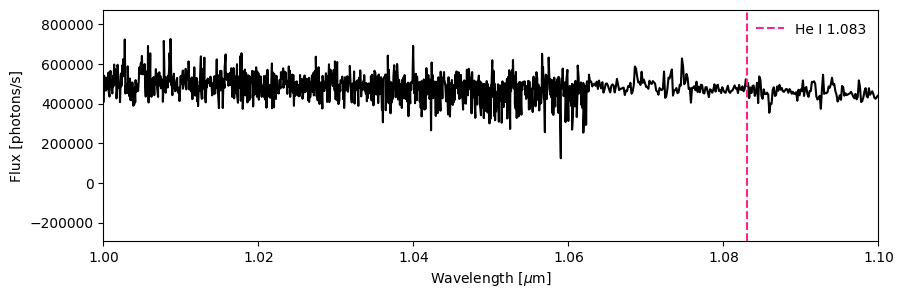

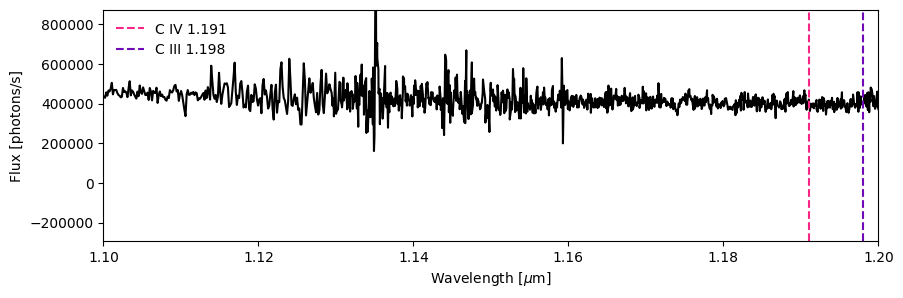

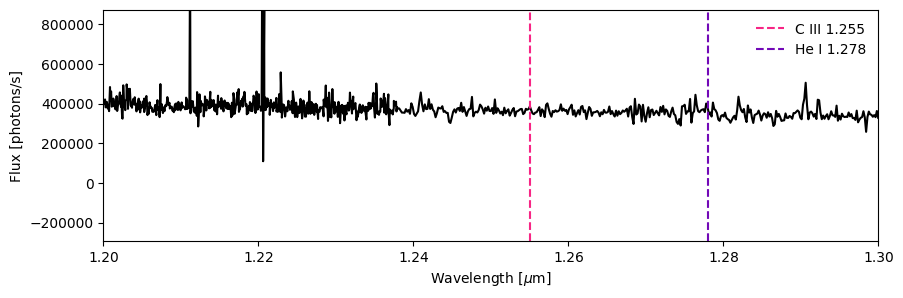

No handles with labels found to put in legend.


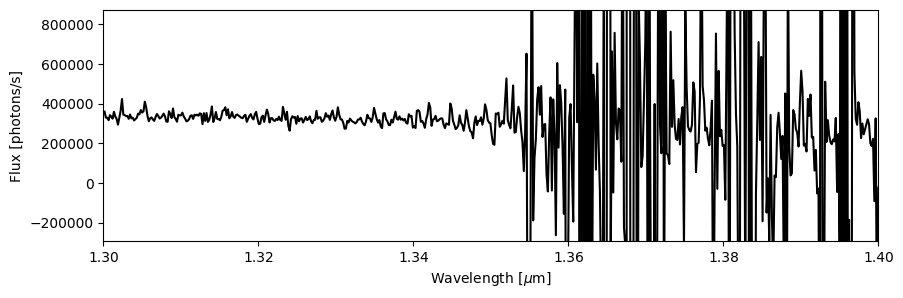

No handles with labels found to put in legend.


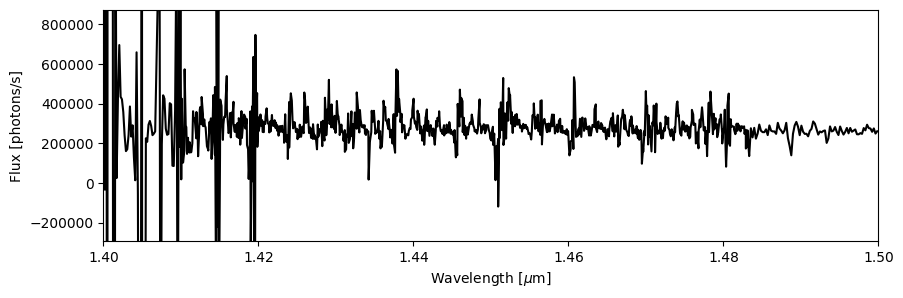

No handles with labels found to put in legend.


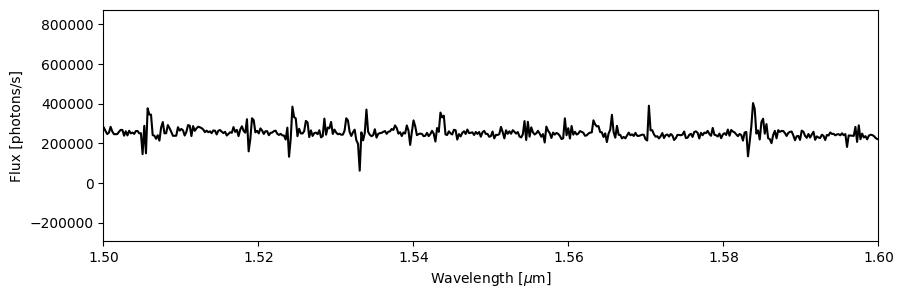

No handles with labels found to put in legend.


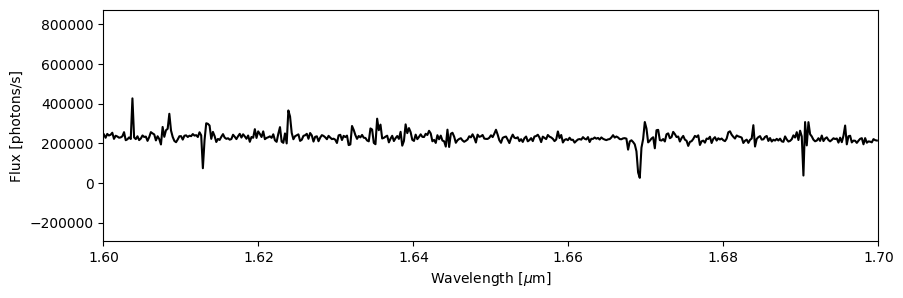

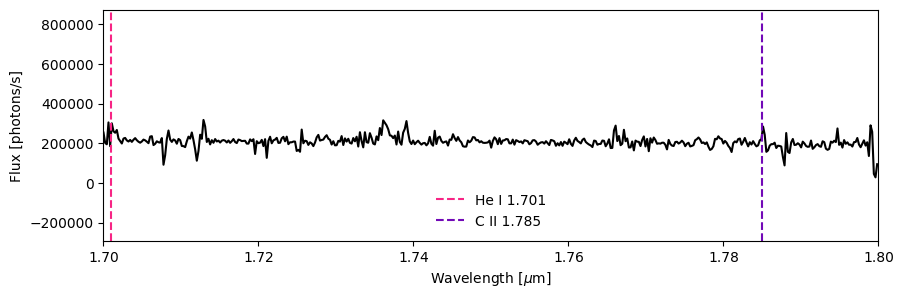

No handles with labels found to put in legend.


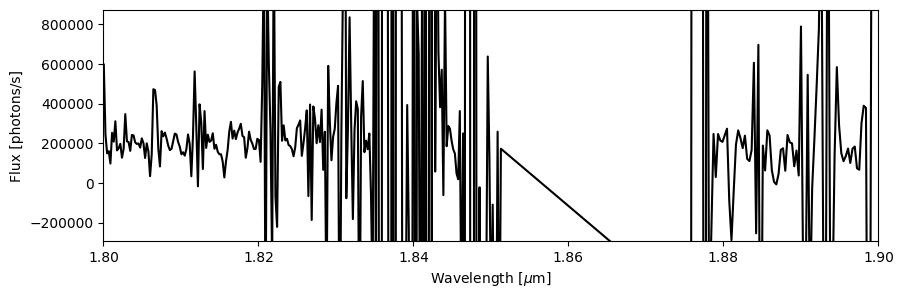

No handles with labels found to put in legend.


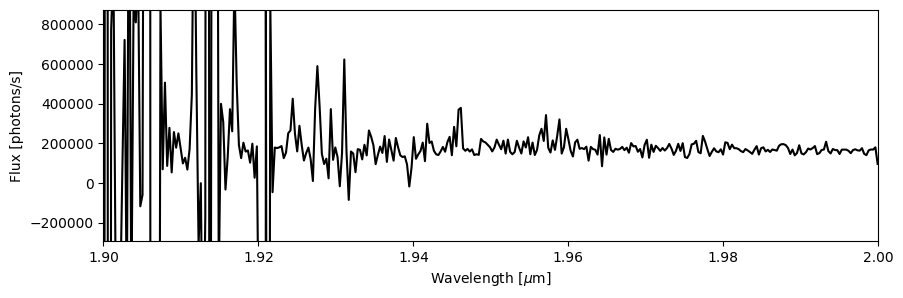

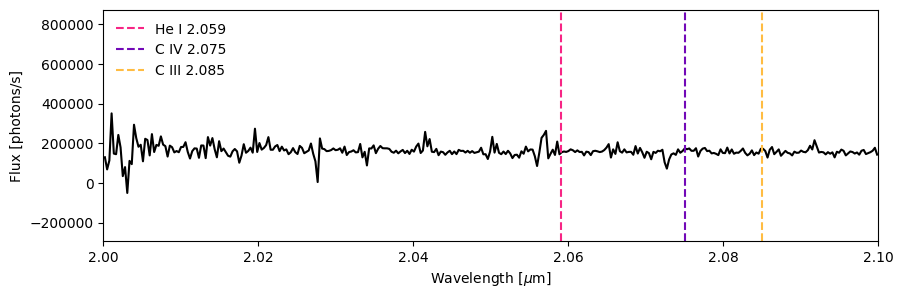

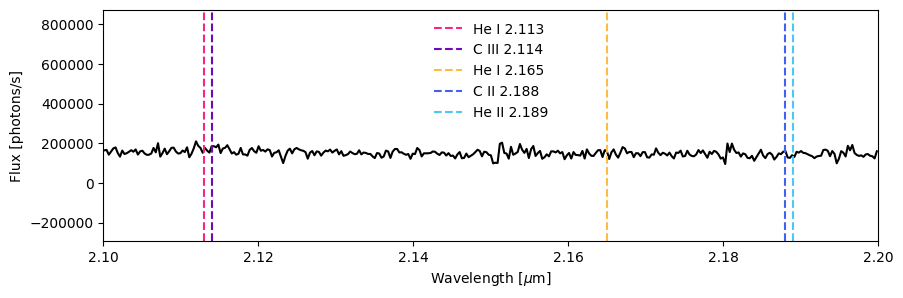

No handles with labels found to put in legend.


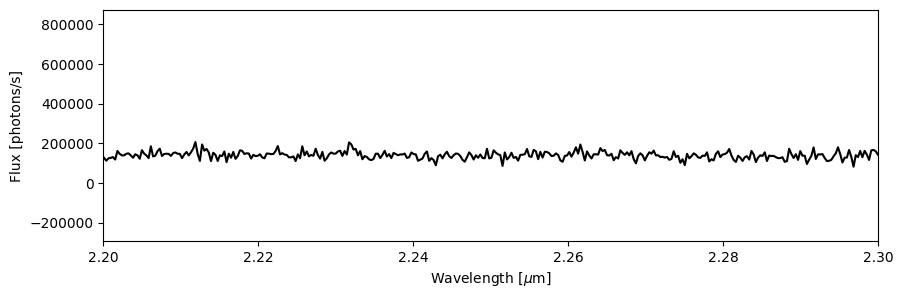

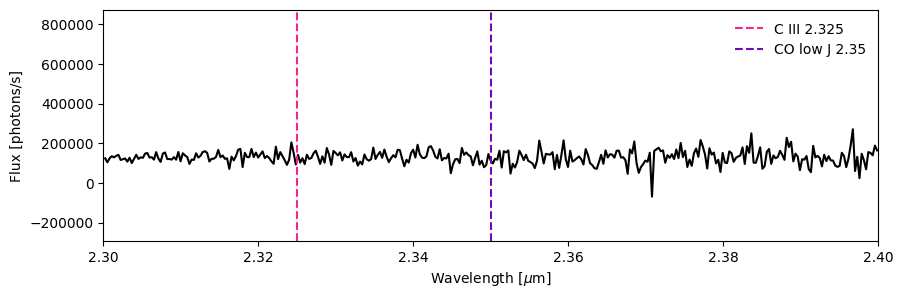

In [13]:
n = 0.1
for wv in np.arange(1, 2.4, n):
    lim = (spec_med[0]>wv)*(spec_med[0]<wv+n)
    lines_lim = (list(lines.values())>wv)*(list(lines.values())<wv+n)
    lines_keys = np.array(list(lines.keys()))[lines_lim]
    
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.plot(spec_med[0][lim], spec_med[1][lim], c='k')
    for i, line in enumerate(lines_keys):
        ax.axvline(lines[line], ls='--', label=line, c=cc[i%5])
    
    plt.xlim(wv, wv+n)
    plt.ylim(np.median(spec_med[1])-2*np.median(spec_med[1]), np.median(spec_med[1])+2*np.median(spec_med[1]))
    plt.xlabel('Wavelength [$\mu$m]')
    plt.ylabel('Flux [photons/s]')
    plt.legend(frameon=False)
    plt.show()

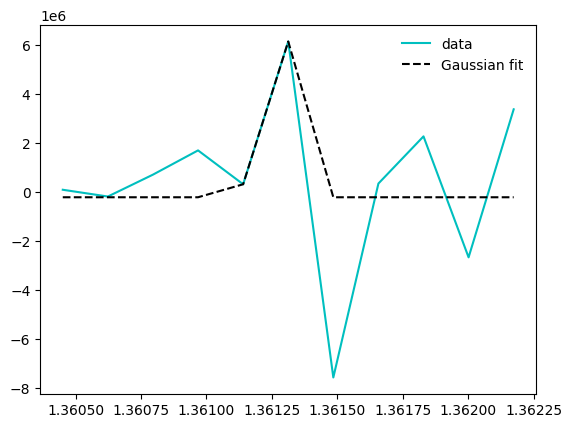

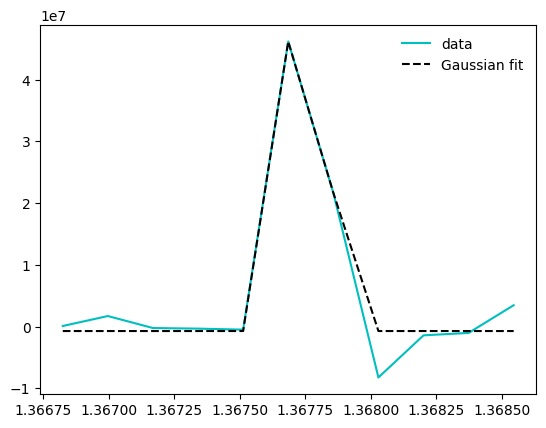

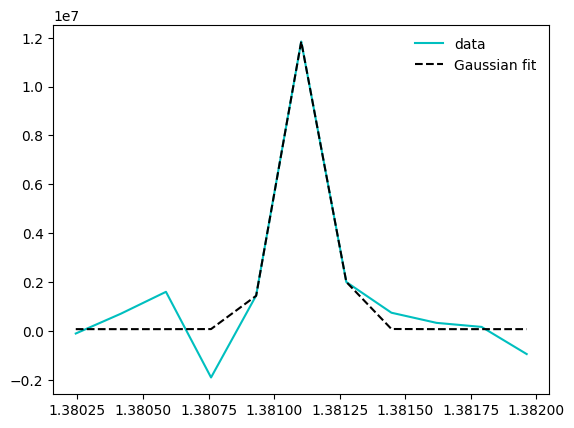

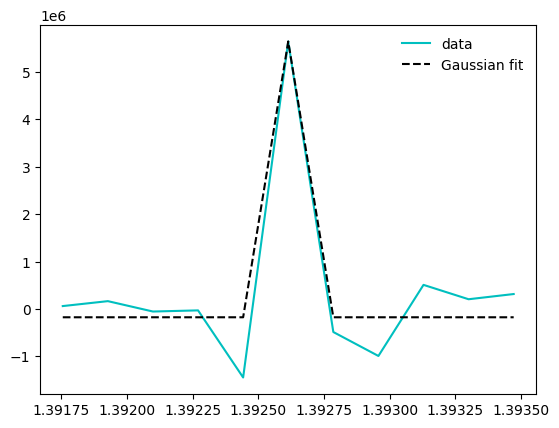

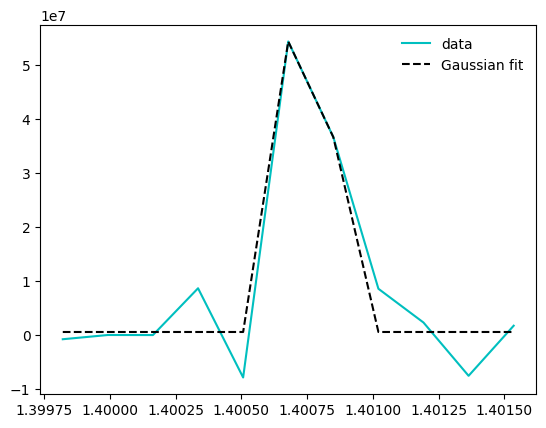

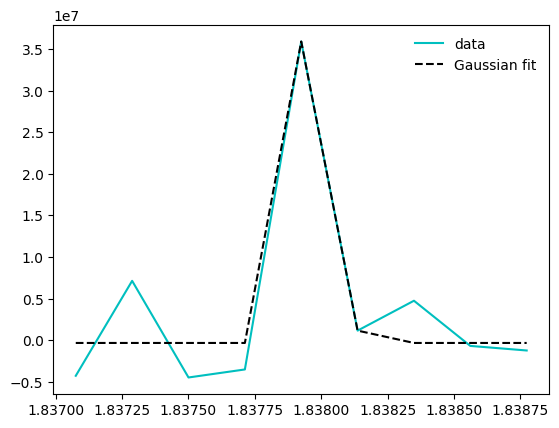

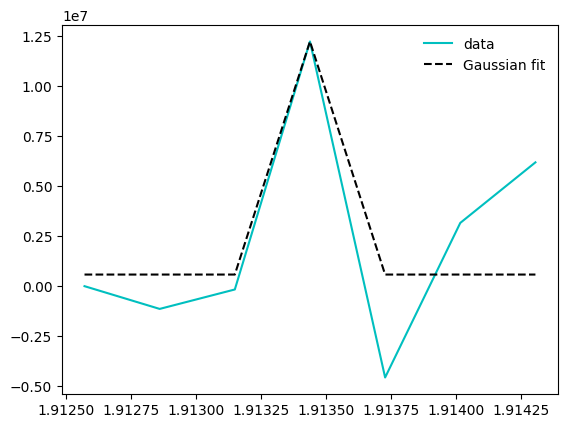

In [15]:
peaks_emit_med_int = [integrate_line(spec_med, peak, plot=True) for peak in peaks_emit_med]

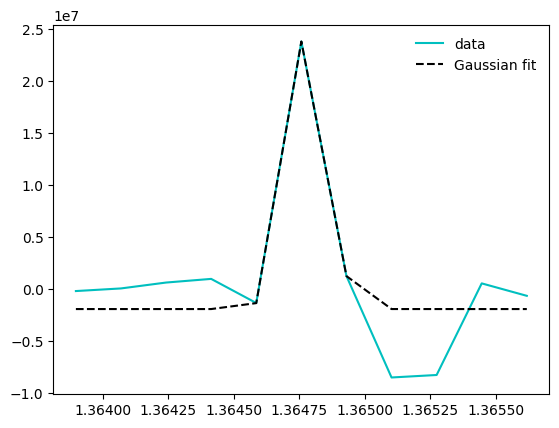

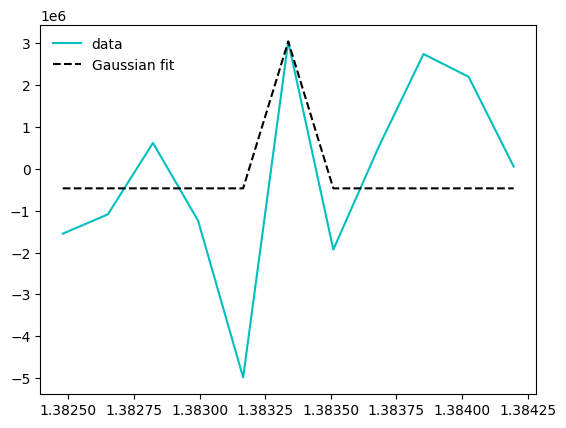

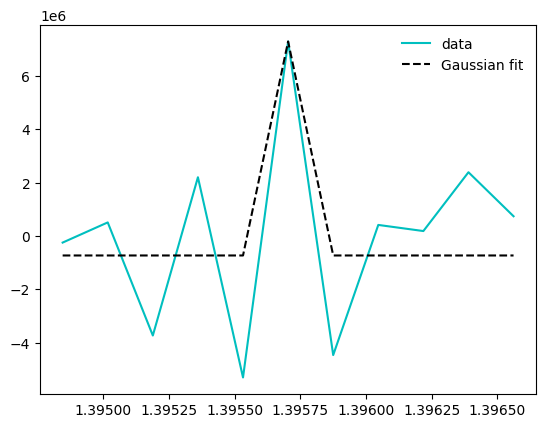

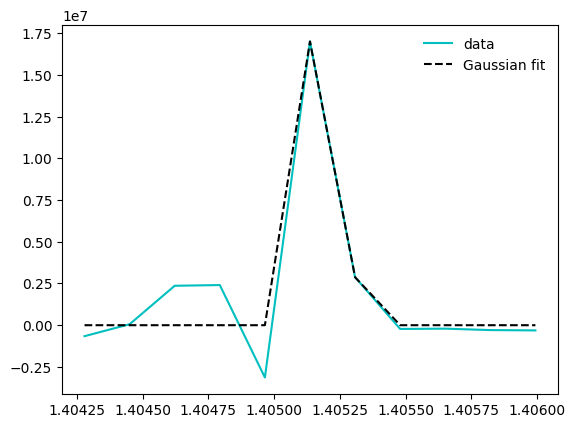

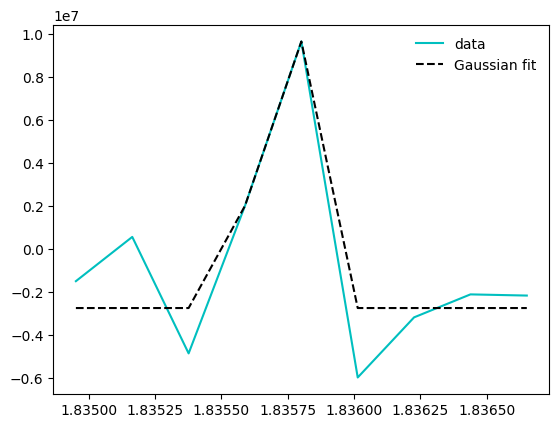

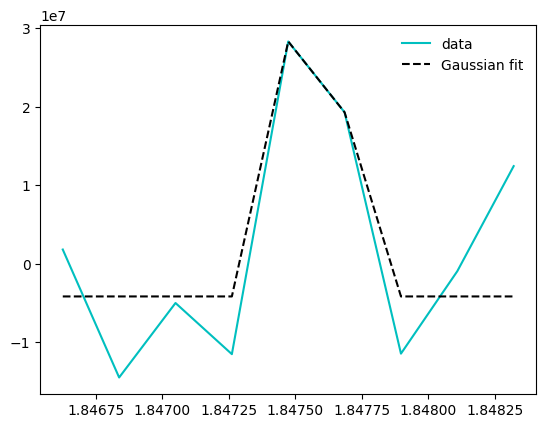

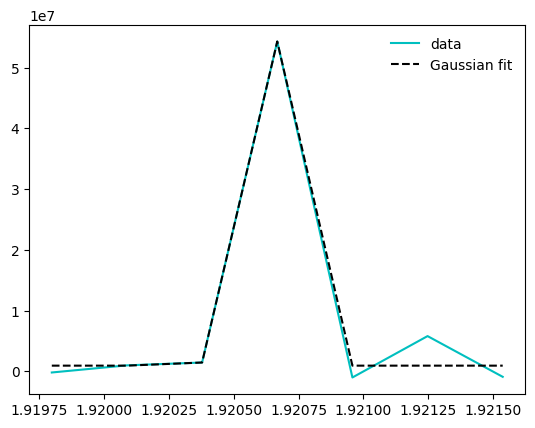

In [16]:
peaks_absorb_med_int = [integrate_line([spec_med[0], -spec_med[1]], peak, plot=True) for peak in peaks_absorb_med]

In [203]:
spec_med[0][peaks_absorb_med]

array([1.36475762, 1.3833379 , 1.39570307, 1.40513643, 1.83580124,
       1.84747349, 1.92066819])

# Looking back at the lines again (this is the bit I actually used)

In [18]:
def integrate_line_wv(spec, center, r=0.001, plot=False):
    '''Center should be a wavelength'''
    lim = np.where((spec[0] < center+r)*(spec[0] > center-r))
    spec_lim = [spec[0][lim], spec[1][lim]]
    try:
        popt, _ = curve_fit(gauss, *spec_lim, p0=[np.max(spec_lim[1]), center, r/10, 0])
        integral = np.trapz(gauss(spec_lim[0], *popt) - popt[3])
        if plot:        
            plt.plot(*spec_lim, c=cc[4], label='data')
            plt.plot(spec_lim[0], gauss(spec_lim[0], *popt), ls='--', c='k', label='Gaussian fit')
            plt.legend(frameon=False)
            plt.show()
        return integral
    except:
        print(f'Unable to fit gaussian {center}')
        return np.NaN

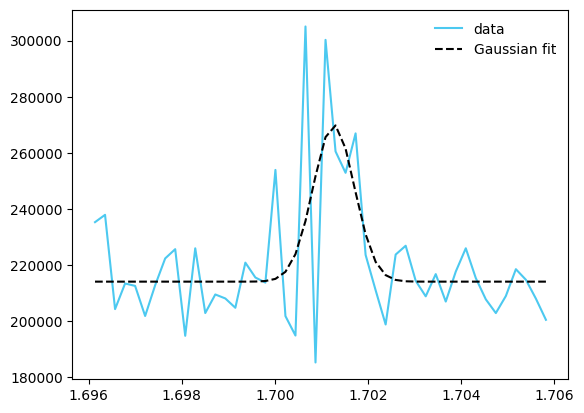

In [19]:
heI1701 = integrate_line_wv(spec_med, 1.701, r=0.005, plot=True)

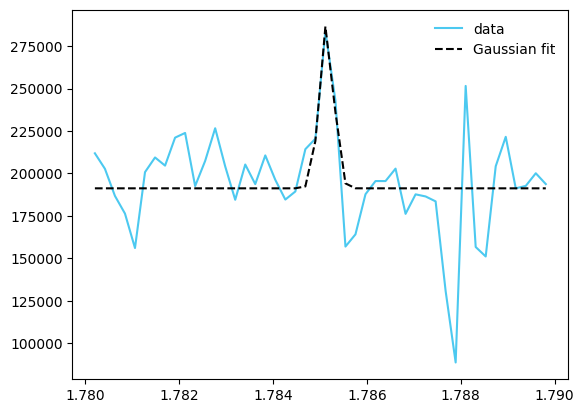

In [20]:
cII1785 = integrate_line_wv(spec_med, 1.785, r=0.005, plot=True)

In [21]:
heI1701/cII1785

1.6672444734434901

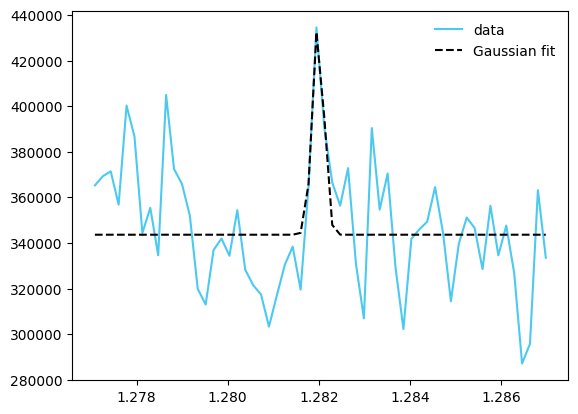

In [22]:
paB = integrate_line_wv(spec_med, 1.282, r=0.005, plot=True)

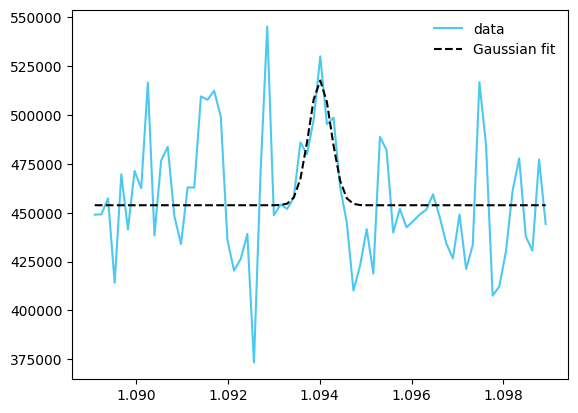

In [23]:
paC = integrate_line_wv(spec_med, 1.094, r=0.005, plot=True)

In [24]:
paC/paB

1.6029649813840912

In [25]:
print(paC/heI1701)
print(paC/cII1785)
print(paB/heI1701)
print(paB/cII1785)

0.9342836926034659
1.5576793231215051
0.5828472258930774
0.9717488162321029
